### Steps to complete this assignements

1. Data Cleaning
    1. Identify the sets of categorical and continuous variables
    2. Find out the percentage of nulls for various columns
    3. Identify meaningful missings and Impute with zero
    4. Drop columns with high missing %.
    5. For less missing % variables, do imputation.
    6. Fancy-Impute
2. Filter High Value Customer 
    1. Calculate Data recharge amount for June and July each
        • Number of recharges(total_rech_data) * avg recharge amount(av_rech_amt_data)
    2. Calculate total recharge amount(data + calling) for June and July each
        • Data recharge amount + Call recharge amount(total_rech_amt)
    3. Calculate average recharge amount done by customer in June and July
    4. Look at the 70th percentile recharge amount
    5. Retain only those customers who have recharged their mobiles with more than or equal to 70th
        percentile amount
3. Derive Churn : 
    1. Calculate total incoming and outgoing minutes of usage
    2. Calculate 2g and 3g data consumption
    3. Create churn variable: those who have not used either calls or internet in the month of
        September are customers who have churned
    4. Check Churn percentage.
    5. Delete columns that belong to the churn month
4. Data Pre-Processing : 
    1. Derived variables (Calculate difference between 8th and previous months)
    2. EDA
    3. Outlier treatment
    4. Train-test Split
    5. Scaling
5. Modeling: Need two models, one with good predictions and other with good interpretability.
6. PCA
        You need to handle the imbalance class.(https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)
7. Model Building
8. HyperParameter Tunning
9. Model Evaluation
10. Make recommendation using Interpretable Model

In [114]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [3]:
#Lets import the data in master data frame 
master_df=pd.read_csv('telecom_churn_data.csv')

In [4]:
#Lets first have a look data
master_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
#What is the shape of Dataframe
master_df.shape

(99999, 226)

In [6]:
#Lets see categorical and continuous variables
continous_cols=master_df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
len(continous_cols)

214

In [7]:
#Lets see categorical and continuous variables
categorical_cols=master_df.select_dtypes(include=['object', 'category']).columns
len(categorical_cols)

12

#### We have 214 cols as numeric out of 226 columns and 12 categorical cols

In [8]:
##Lets first drop all the columns which were not required in analysis as per bussiness decisions
# Mobile No: every value is unique hence not purpose of use
master_df=master_df.drop(['mobile_number'],axis=1)

In [9]:
master_df=master_df.drop(['circle_id'],axis=1)

In [10]:
#Lets check all those colums which have only one type of values in complete data set.
#Lets now focus on categorical column which only have one type of values in complete column
cols=master_df.select_dtypes(include=['category', 'object'])
only_1_value_counts=[]
for col in cols:
    value_counts=len(master_df[col].value_counts())
    if value_counts == 1:
        only_1_value_counts.append(col)
print(only_1_value_counts)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']


In [11]:
#Lets these columns doesn't have more than one type of value
master_df=master_df.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'],axis=1)
master_df.shape    

(99999, 220)

### Also drop all those columns which are not null but have just one value in columns such as std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8 etc

In [12]:
#Lets find those type of columns first
cols=master_df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
sum_0=[]
for col in cols:
    sum_=master_df[col].sum()
    if sum_ == 0:
        sum_0.append(col)
print(sum_0)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [13]:
master_df=master_df.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],axis=1)
master_df.shape    

(99999, 209)

#Lets find those type of columns first
cols=master_df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
sum_0=[]
only_1_value_counts_num=[]
for col in cols:
    value_counts=len(master_df[col].value_counts())
    if value_counts == 1:
        only_1_value_counts_num.append(col)
print(only_1_value_counts_num)

Step1.2 Find out the percentage of nulls for various columns

In [14]:
percent_missing = master_df.isnull().sum() * 100 / len(master_df)
missing_value_df = pd.DataFrame({'column_name': master_df.columns,'column_name': master_df.dtypes,
                                 'percent_missing': percent_missing})

In [15]:
missing_value_df.sort_values('percent_missing', inplace=True)

In [16]:
#Total columns which have missing values
len(missing_value_df[missing_value_df['percent_missing']>0])

152

In [17]:
#Total columns which have more than 70% missing values
missing_value_70=missing_value_df[missing_value_df['percent_missing']>70]
missing_value_70.shape[0]

40

#### There are more then 40 columns which have more than 70% null values

In [18]:
# Lets have a look on columns
missing_value_70

column_name  percent_missing
date_of_last_rech_data_8      object        73.660737
arpu_3g_8                    float64        73.660737
count_rech_3g_8              float64        73.660737
night_pck_user_8             float64        73.660737
arpu_2g_8                    float64        73.660737
max_rech_data_8              float64        73.660737
av_rech_amt_data_8           float64        73.660737
count_rech_2g_8              float64        73.660737
total_rech_data_8            float64        73.660737
fb_user_8                    float64        73.660737
night_pck_user_9             float64        74.077741
date_of_last_rech_data_9      object        74.077741
arpu_3g_9                    float64        74.077741
total_rech_data_9            float64        74.077741
max_rech_data_9              float64        74.077741
av_rech_amt_data_9           float64        74.077741
count_rech_2g_9              float64        74.077741
count_rech_3g_9              float64        74.077741
arpu_2g_9                    float64        74.077741
fb_user_9                    float64        74.077741
fb_user_7                    float64        74.428744
count_rech_3g_7              float64        74.428744
count_rech_2g_7              float64        74.428744
arpu_2g_7                    float64        74.428744
arpu_3g_7                    float64        74.428744
date_of_last_rech_data_7      object        74.428744
av_rech_amt_data_7           float64        74.428744
total_rech_data_7            float64        74.428744
night_pck_user_7             float64        74.428744
max_rech_data_7              float64        74.428744
date_of_last_rech_data_6      object        74.846748
max_rech_data_6              float64        74.846748
night_pck_user_6             float64        74.846748
fb_user_6                    float64        74.846748
count_rech_3g_6              float64        74.846748
av_rech_amt_data_6           float64        74.846748
arpu_3g_6                    float64        74.846748
arpu_2g_6                    float64        74.846748
count_rech_2g_6              float64        74.846748
total_rech_data_6            float64        74.846748

In [19]:
missing_value_70.index

Index(['date_of_last_rech_data_8', 'arpu_3g_8', 'count_rech_3g_8',
       'night_pck_user_8', 'arpu_2g_8', 'max_rech_data_8',
       'av_rech_amt_data_8', 'count_rech_2g_8', 'total_rech_data_8',
       'fb_user_8', 'night_pck_user_9', 'date_of_last_rech_data_9',
       'arpu_3g_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'arpu_2g_9',
       'fb_user_9', 'fb_user_7', 'count_rech_3g_7', 'count_rech_2g_7',
       'arpu_2g_7', 'arpu_3g_7', 'date_of_last_rech_data_7',
       'av_rech_amt_data_7', 'total_rech_data_7', 'night_pck_user_7',
       'max_rech_data_7', 'date_of_last_rech_data_6', 'max_rech_data_6',
       'night_pck_user_6', 'fb_user_6', 'count_rech_3g_6',
       'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6', 'count_rech_2g_6',
       'total_rech_data_6'],
      dtype='object')

#### For few columns missing value means zero values. Specially recharge columns NaN means 0 recharge for that period of time.

In [20]:
master_df[['max_rech_data_8','total_rech_data_8', 'av_rech_amt_data_8','av_rech_amt_data_9', 'total_rech_data_9',
      'max_rech_data_9', 'total_rech_data_7','max_rech_data_7', 'av_rech_amt_data_7', 'total_rech_data_6',
       'max_rech_data_6', 'av_rech_amt_data_6']]=master_df[['max_rech_data_8','total_rech_data_8', 'av_rech_amt_data_8','av_rech_amt_data_9', 'total_rech_data_9',
      'max_rech_data_9', 'total_rech_data_7','max_rech_data_7', 'av_rech_amt_data_7', 'total_rech_data_6',
       'max_rech_data_6', 'av_rech_amt_data_6']].fillna(0)

In [21]:
percent_missing = master_df.isnull().sum() * 100 / len(master_df)
missing_value_df = pd.DataFrame({'column_name': master_df.columns,'column_name': master_df.dtypes,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_70=missing_value_df[missing_value_df['percent_missing']>70]
missing_value_70.shape[0]

28

In [22]:
#Now drop other 28 columns 
master_df=master_df.dropna(thresh=master_df.shape[0]*0.7,how='all',axis=1)

In [23]:
percent_missing = master_df.isnull().sum() * 100 / len(master_df)
missing_value_df = pd.DataFrame({'column_name': master_df.columns,'column_name': master_df.dtypes,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_1=missing_value_df[missing_value_df['percent_missing']>0]
missing_value_1.shape[0]

112

In [24]:
missing_value_1.head(10)

column_name  percent_missing
date_of_last_rech_6      object         1.607016
date_of_last_rech_7      object         1.767018
date_of_last_rech_8      object         3.622036
std_ic_mou_7            float64         3.859039
std_ic_t2t_mou_7        float64         3.859039
std_og_mou_7            float64         3.859039
loc_og_t2c_mou_7        float64         3.859039
std_ic_t2m_mou_7        float64         3.859039
roam_og_mou_7           float64         3.859039
ic_others_7             float64         3.859039

In [25]:
missing_value_1.reset_index()
missing_value_1.head()

column_name  percent_missing
date_of_last_rech_6      object         1.607016
date_of_last_rech_7      object         1.767018
date_of_last_rech_8      object         3.622036
std_ic_mou_7            float64         3.859039
std_ic_t2t_mou_7        float64         3.859039

####  Now we have total 112 columns which have missing values 

In [26]:
master_df[missing_value_1.index].describe()

std_ic_mou_7  std_ic_t2t_mou_7  std_og_mou_7  loc_og_t2c_mou_7  \
count  96140.000000      96140.000000  96140.000000      96140.000000   
mean      33.887833         10.011904    175.221436          1.368500   
std      113.720168         57.411971    408.922934          7.533445   
min        0.000000          0.000000      0.000000          0.000000   
25%        0.000000          0.000000      0.000000          0.000000   
50%        5.960000          0.000000     11.090000          0.000000   
75%       28.310000          4.230000    150.615000          0.000000   
max     6745.760000       5800.930000  10936.730000        916.240000   

       std_ic_t2m_mou_7  roam_og_mou_7   ic_others_7  isd_ic_mou_7  \
count      96140.000000   96140.000000  96140.000000  96140.000000   
mean          21.656415       9.818732      1.012960      8.334936   
std           86.521393      58.455762     12.673099     65.219829   
min            0.000000       0.000000      0.000000      0.000000   
25%            0.000000       0.000000      0.000000      0.000000   
50%            2.040000       0.000000      0.000000      0.000000   
75%           15.740000       0.000000      0.000000      0.000000   
max         6141.880000    2812.040000   1495.940000   5289.540000   

       loc_og_t2f_mou_7   og_others_7  loc_og_t2t_mou_7  spl_ic_mou_7  \
count      96140.000000  96140.000000      96140.000000  96140.000000   
mean           3.792985      0.030235         46.473010      0.033585   
std           14.264986      2.161717        155.318705      0.155725   
min            0.000000      0.000000          0.000000      0.000000   
25%            0.000000      0.000000          1.630000      0.000000   
50%            0.000000      0.000000         11.610000      0.000000   
75%            2.090000      0.000000         39.910000      0.000000   
max         1196.430000    370.130000       7400.660000     21.330000   

       loc_og_t2m_mou_7  std_ic_t2f_mou_7  roam_ic_mou_7  loc_og_mou_7  \
count      96140.000000      96140.000000   96140.000000  96140.000000   
mean          91.397131          2.216923       7.149898    141.670476   
std          157.492308         16.454061      73.447948    248.731086   
min            0.000000          0.000000       0.000000      0.000000   
25%           10.025000          0.000000       0.000000     17.480000   
50%           40.430000          0.000000       0.000000     63.685000   
75%          107.560000          0.000000       0.000000    164.382500   
max         4557.140000       1136.080000   15371.040000   7674.780000   

       loc_ic_mou_7  spl_og_mou_7  loc_ic_t2t_mou_7   onnet_mou_7  \
count  96140.000000  96140.000000      96140.000000  96140.000000   
mean     167.719540      4.978279         47.990520    133.670805   
std      256.242707     20.661570        145.795055    308.794148   
min        0.000000      0.000000          0.000000      0.000000   
25%       32.460000      0.000000          3.230000      6.660000   
50%       92.550000      0.000000         15.740000     32.330000   
75%      205.837500      3.710000         45.810000    115.595000   
max     9669.910000   2372.510000       9324.660000   8157.780000   

       loc_ic_t2m_mou_7  isd_og_mou_7  std_og_t2t_mou_7  std_og_t2m_mou_7  \
count      96140.000000  96140.000000      96140.000000      96140.000000   
mean         107.120493      0.776572         83.299598         90.804137   
std          169.423620     25.603052        263.631042        269.347911   
min            0.000000      0.000000          0.000000          0.000000   
25%           18.590000      0.000000          0.000000          0.000000   
50%           57.080000      0.000000          0.000000          3.635000   
75%          130.960000      0.000000         31.132500         54.040000   
max         4455.830000   5490.280000       8133.660000       9284.740000   

       loc_ic_t2f_mou_7  offnet_mou_7  std_og_t2f_mou_7  loc_og_t2c_mou_6  \


In [27]:
#Lets find out how many columns are continous and then impute with median as there are outliers
cols=master_df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
for col in cols:
    master_df[col].fillna(master_df[col].median(), inplace=True)


In [28]:
#cols=master_df.select_dtypes(include=['object', 'category'])
#cols

In [29]:
#Lets find out how many columns are continous and impute with mode
cols=master_df.select_dtypes(include=['object', 'category'])
for col in cols:
    master_df[col].fillna(master_df[col].mode().iloc[0], inplace=True)


In [30]:
percent_missing = master_df.isnull().sum() * 100 / len(master_df)
missing_value_df = pd.DataFrame({'column_name': master_df.columns,'column_name': master_df.dtypes,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_1=missing_value_df[missing_value_df['percent_missing']>0]
missing_value_1.shape[0]

0

In [31]:
master_df.shape

(99999, 181)

#### Now we don't have any missing values in dataset

### High Value customer Filteration

In [32]:
#First add Data Recharge amount for 6th and 7th months
master_df['data_rchg_amt_6']=master_df['total_rech_data_6']*master_df['av_rech_amt_data_6']

In [33]:
master_df['data_rchg_amt_7']=master_df['total_rech_data_7']*master_df['av_rech_amt_data_7']

In [34]:
master_df['total_rch_amt_data_calling_6']=master_df['data_rchg_amt_6']+master_df['total_rech_amt_6']

In [35]:
master_df['total_rch_amt_data_calling_7']=master_df['data_rchg_amt_7']+master_df['total_rech_amt_7']

In [36]:
master_df['avg_amt_6_7']=(master_df['total_rch_amt_data_calling_6']+master_df['total_rch_amt_data_calling_7'])/2

In [37]:
master_df['avg_amt_6_7'].quantile([.70]) 

0.7    478.0
Name: avg_amt_6_7, dtype: float64

In [38]:
master_df=master_df[master_df['avg_amt_6_7']>=478.0] 

In [39]:
# We filter out only top 30 percentile/high-value customers
master_df.shape

(30001, 186)

In [40]:
master_df.to_csv('master_df.csv')

#### We get same number as suggested by @ReenDuggal Ma'am.

## Derive Churn

In [41]:
master_df['total_in_ou_mou']=master_df['total_og_mou_9']+master_df['total_ic_mou_9']

In [42]:
master_df['total_2g_3g_consumption']=master_df['vol_2g_mb_9']+master_df['vol_3g_mb_9']

In [43]:
master_df['churn']=np.where(master_df['total_2g_3g_consumption']+master_df['total_in_ou_mou']==0,1,0)

In [44]:
master_df['churn'].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

#### approx 8 % are customers who churned in 9th Month

#### Same as suggested by @Reena Duggal Ma'am 92% not churn and 8% churn

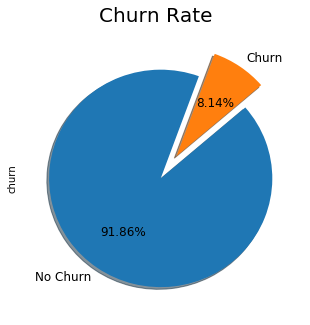

In [45]:
f, ax = plt.subplots(1, figsize=(5,5))
labels ="No Churn", "Churn"
plt.suptitle('Churn Rate', fontsize=20)

master_df["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%',  shadow=True,  
                                             labels=labels, fontsize=12, startangle=70)


In [46]:
cols=master_df.select_dtypes(include=['object', 'category'])
cols

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0               6/21/2014           7/16/2014            8/8/2014   
7               6/27/2014           7/25/2014           8/26/2014   
8               6/25/2014           7/31/2014           8/30/2014   
21              6/30/2014           7/31/2014           8/31/2014   
23              6/18/2014            7/7/2014           8/24/2014   
33              6/30/2014           7/30/2014           8/26/2014   
38              6/30/2014           7/28/2014           8/24/2014   
41              6/24/2014           7/22/2014           8/31/2014   
48              6/29/2014           7/23/2014           8/28/2014   
53              6/29/2014           7/31/2014           8/26/2014   
56              6/28/2014           7/30/2014           8/31/2014   
57              6/29/2014           7/26/2014           8/24/2014   
61              6/28/2014           7/29/2014           8/23/2014   
67              6/25/2014           7/16/2014            8/2/2014   
69              6/30/2014           7/28/2014           8/31/2014   
73              6/30/2014           7/31/2014           8/31/2014   
77              6/17/2014           7/27/2014           8/27/2014   
86              6/25/2014           7/27/2014           8/28/2014   
87              6/28/2014           7/29/2014           8/31/2014   
91              6/30/2014           7/27/2014           8/27/2014   
92              6/29/2014           7/29/2014           8/21/2014   
96              6/30/2014           7/28/2014           8/29/2014   
101             6/25/2014           7/29/2014           8/30/2014   
102             6/20/2014           7/28/2014           8/26/2014   
103             6/30/2014           7/30/2014           8/25/2014   
104             6/27/2014           7/29/2014           8/23/2014   
105             6/22/2014           7/31/2014           8/24/2014   
111             6/13/2014           7/27/2014           8/24/2014   
115             6/25/2014           7/25/2014           8/29/2014   
124             6/30/2014           7/31/2014           8/30/2014   
131             6/28/2014           7/31/2014           8/28/2014   
133             6/26/2014           7/31/2014           8/28/2014   
134             6/16/2014           7/25/2014           8/17/2014   
146             6/21/2014           7/30/2014           8/30/2014   
147             6/20/2014           7/29/2014           8/26/2014   
149             6/27/2014           7/19/2014           8/31/2014   
154             6/21/2014           7/20/2014           8/25/2014   
157             6/30/2014           7/26/2014           8/27/2014   
158             6/22/2014           7/31/2014           8/29/2014   
170             6/30/2014           7/28/2014           8/27/2014   
171             6/29/2014           7/31/2014           8/30/2014   
172             6/16/2014           7/25/2014           8/26/2014   
173             6/29/2014           7/30/2014           8/31/2014   
176             6/29/2014           7/31/2014           8/30/2014   
177             6/28/2014           7/29/2014           8/22/2014   
184             6/29/2014           7/30/2014           8/31/2014   
185             6/28/2014           7/31/2014           8/19/2014   
188             6/28/2014            7/7/2014           8/31/2014   
191             6/12/2014           7/30/2014           8/31/2014   
193             6/26/2014           7/29/2014           8/30/2014   
195             6/25/2014           7/24/2014           8/26/2014   
199             6/30/2014           7/27/2014           8/25/2014   
204             6/27/2014           7/24/2014           8/28/2014   
206             6/30/2014           7/26/2014           8/30/2014   
208             6/28/2014           7/29/2014           8/28/2014   
212             6/26/2014           7/30/2014           8/30/2014   
213             6/27/2014           7/31/2014           8/31/2014   
218 

In [47]:
#Lets delete all columns of 9th months
master_df = master_df[master_df.columns.drop(list(master_df.filter(regex='_9')))]

In [48]:
#Lets delete all date columns as they are not informative
# list of all columns which store date
date_cols = list(master_df.filter(regex='date').columns)
date_cols
master_df.drop(date_cols, axis=1, inplace=True)

In [49]:
master_df.shape

(30001, 142)

In [50]:
master_df.to_csv('master_df_churned.csv')

### Derived variables (Calculate difference between 8th and previous months)

In [51]:
master_df['diff_arpu']=master_df['arpu_8']-(master_df['arpu_6']+master_df['arpu_7'])/2

In [52]:
master_df['diff_total_og_mou']=master_df['total_og_mou_8']-(master_df['total_og_mou_6']+master_df['total_og_mou_7'])/2

In [53]:
master_df['diff_total_ic_mou']=master_df['total_ic_mou_8']-(master_df['total_ic_mou_7']+master_df['total_ic_mou_6'])/2

In [54]:
master_df['diff_total_rech_amt']=master_df['total_rech_amt_8']-(master_df['total_rech_amt_7']+master_df['total_rech_amt_6'])/2

In [55]:
master_df['diff_total_rech_num']=master_df['total_rech_num_8']-(master_df['total_rech_num_7']+master_df['total_rech_num_6'])/2

In [56]:
master_df.shape

(30001, 147)

## Treating Outliers

In [57]:
master_df.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     558.490824    560.782203    508.597957    261.416302    268.397982   
std      460.640461    479.776947    501.961981    459.313442    479.690135   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      309.865000    309.826000    231.473000     20.010000     18.930000   
50%      481.694000    480.943000    427.585000     84.580000     82.810000   
75%      699.943000    698.315000    661.491000    290.440000    290.240000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000   
mean     235.378852    375.443534    379.745170    338.682670      16.110355   
std      457.844464    481.338526    497.826193    479.882371      76.302156   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       15.630000     80.710000     78.540000     63.190000       0.000000   
50%       65.610000    222.540000    220.030000    182.790000       0.000000   
75%      239.960000    487.940000    494.010000    438.890000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       12.642504      12.500551      26.571547      20.152086   
std        75.785903      74.125281     116.205525      96.100428   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30001.000000      30001.000000      30001.000000      30001.000000   
mean       19.865615         84.701111         85.882099         78.536131   
std       104.719009        228.719626        240.456891        227.227313   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          5.240000          5.530000          4.360000   
50%         0.000000         24.330000         24.680000         20.730000   
75%         0.000000         77.980000         78.340000         72.040000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean         163.988650        163.733636        153.336181          6.344115   
std          249.689878        241.147466        232.764460         22.123561   
min            0.000000          0.000000          0.000000          0.000000   
25%           21.840000         23.680000         19.090000          0.000000   
50%           77.180000         78.880000         67.760000          0.000000   
75%          208.930000        208.410000        196.960000          4.230000   
max         4729.740000       4557.140000       4961.330000       1466.030000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean           6.423683          5.886385          1.575104          1.889875   
std           21.944183         19.502281          6.303385          9.158984   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.100000          0.0000

##### We can see there are lots of variables have outliers such diff_total_og_mou in which max is 12768 while mean is only  221

In [58]:
#Lets have a copy of master_df then apply outliers so that any mistake can easily revertable
master_df_copy=master_df.copy()

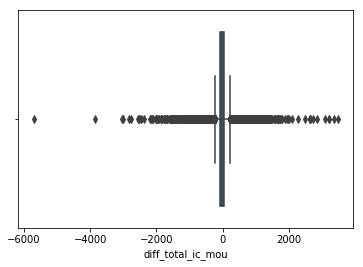

In [59]:
sns.boxplot(x=master_df_copy['diff_total_ic_mou'])

In [60]:
Q1 = master_df_copy['diff_total_ic_mou'].quantile(0.25)
Q3 = master_df_copy['diff_total_ic_mou'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

111.51000000000002


In [61]:
master_df_copy=master_df_copy[~((master_df_copy['diff_total_ic_mou'] < (Q1 - 1.5 * IQR)) |(master_df_copy['diff_total_ic_mou'] > (Q3 + 1.5 * IQR)))]

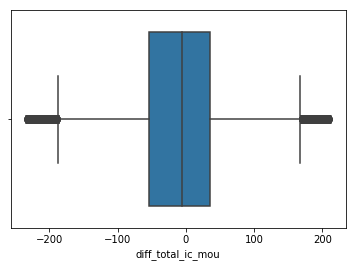

In [62]:
sns.boxplot(x=master_df_copy['diff_total_ic_mou'])

In [63]:
master_df_copy.shape

(26146, 147)

In [64]:
master_df_copy.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  26146.000000  26146.000000  26146.000000  26146.000000  26146.000000   
mean     539.161175    542.342760    494.614105    256.352101    265.528911   
std      441.629093    469.146407    493.470631    451.194397    478.973860   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      299.874750    300.408250    229.200500     18.160000     16.960000   
50%      469.875500    469.515500    420.155500     79.730000     77.690000   
75%      676.739250    677.028500    643.217250    283.020000    286.115000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  26146.000000  26146.000000  26146.000000  26146.000000   26146.000000   
mean     233.247284    360.087073    365.661388    327.294607      13.747447   
std      452.191936    471.435316    491.879160    472.545338      67.811608   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       14.280000     73.295000     70.710000     58.032500       0.000000   
50%       62.650000    208.340000    205.375000    174.235000       0.000000   
75%      235.707500    466.337500    474.825000    422.670000       0.000000   
max     9977.410000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   26146.000000   26146.000000   26146.000000   26146.000000   
mean       10.223356      10.285364      24.883287      18.605992   
std        65.837388      65.652836     111.293721      93.062976   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   26146.000000      26146.000000      26146.000000      26146.000000   
mean       18.431653         75.759551         77.980467         71.521377   
std       102.363802        204.468919        225.043831        204.836282   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          4.610000          4.740000          3.830000   
50%         0.000000         21.780000         22.200000         19.140000   
75%         0.000000         70.755000         71.130000         66.010000   
max      5337.040000       6093.340000       7400.660000       9760.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      26146.000000      26146.000000      26146.000000      26146.000000   
mean         148.608868        149.470768        140.901209          6.011502   
std          225.729045        222.346537        214.354737         22.155987   
min            0.000000          0.000000          0.000000          0.000000   
25%           19.480000         20.382500         17.230000          0.000000   
50%           68.230000         69.960000         62.090000          0.000000   
75%          188.840000        190.855000        182.470000          3.780000   
max         3743.190000       4557.140000       4961.330000       1466.030000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      26146.000000      26146.000000      26146.000000      26146.000000   
mean           6.049679          5.570599          1.559103          1.888225   
std           21.586864         19.056856          6.283913          9.354648   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.0000

In [65]:
Q1 = master_df_copy['diff_total_og_mou'].quantile(0.25)
Q3 = master_df_copy['diff_total_og_mou'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

206.95250000000001


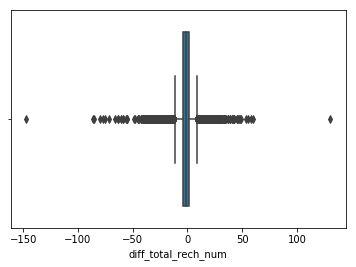

In [66]:
sns.boxplot(master_df_copy['diff_total_rech_num'])

In [67]:
master_df_copy=master_df_copy[~((master_df_copy['diff_total_og_mou'] < (Q1 - 1.5 * IQR)) |(master_df_copy['diff_total_og_mou'] > (Q3 + 1.5 * IQR)))]

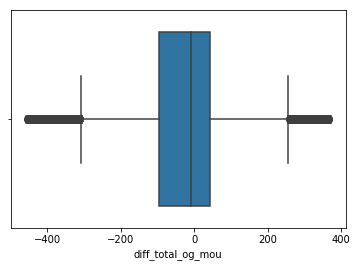

In [68]:
sns.boxplot(master_df_copy['diff_total_og_mou'])

In [69]:
master_df_copy.shape

(21640, 147)

In [70]:
master_df_copy.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  21640.000000  21640.000000  21640.000000  21640.000000  21640.000000   
mean     498.326171    501.154984    467.822521    183.051211    188.735797   
std      424.365238    458.868432    458.997938    313.466660    336.412012   
min     -383.565000  -2014.045000   -146.859000      0.000000      0.000000   
25%      280.129000    278.640250    235.647250     13.280000     12.137500   
50%      440.576000    439.127500    408.862000     61.395000     58.940000   
75%      624.187250    625.805000    601.187750    201.407500    201.555000   
max    27731.088000  35145.834000  33543.624000   4611.790000   5329.360000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  21640.000000  21640.000000  21640.000000  21640.000000   21640.000000   
mean     174.417938    289.249660    293.079352    273.652331      12.868766   
std      311.615885    343.998461    361.056669    336.011741      66.859609   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       12.090000     61.505000     58.905000     54.605000       0.000000   
50%       53.330000    179.820000    175.775000    162.385000       0.000000   
75%      184.500000    398.437500    401.502500    378.480000       0.000000   
max     4638.860000   5905.140000   5490.280000   5836.760000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   21640.000000   21640.000000   21640.000000   21640.000000   
mean        9.825673       9.399746      20.719189      15.648931   
std        68.219956      66.709433      94.749374      85.880819   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    2179.080000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   21640.000000      21640.000000      21640.000000      21640.000000   
mean       15.281162         67.087210         68.339397         63.731212   
std        96.369766        146.396685        160.733407        141.768457   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          4.380000          4.330000          4.240000   
50%         0.000000         21.690000         21.840000         20.190000   
75%         0.000000         70.865000         70.495000         66.865000   
max      5337.040000       3411.680000       4692.740000       3780.030000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      21640.000000      21640.000000      21640.000000      21640.000000   
mean         144.135204        145.562426        138.863194          6.527061   
std          197.172979        198.917543        188.910273         20.726529   
min            0.000000          0.000000          0.000000          0.000000   
25%           19.910000         20.125000         19.537500          0.000000   
50%           71.580000         72.250000         67.380000          0.100000   
75%          194.315000        195.210000        188.710000          4.460000   
max         2688.290000       2998.990000       2640.830000        617.580000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      21640.000000      21640.000000      21640.000000      21640.000000   
mean           6.592918          6.092118          1.425412          1.703354   
std           20.940718         19.522013          5.676711          7.944641   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.180000          0.0000

In [71]:
Q1 = master_df_copy['diff_total_rech_num'].quantile(0.25)
Q3 = master_df_copy['diff_total_rech_num'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

4.5


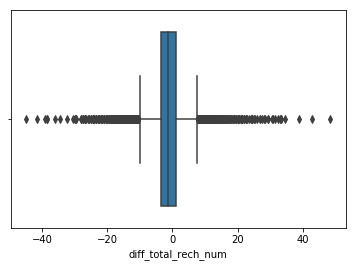

In [72]:
sns.boxplot(master_df_copy['diff_total_rech_num'])

In [73]:
master_df_copy=master_df_copy[~((master_df_copy['diff_total_rech_num'] < (Q1 - 1.5 * IQR)) |(master_df_copy['diff_total_rech_num'] > (Q3 + 1.5 * IQR)))]

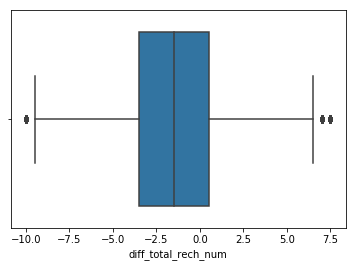

In [74]:
sns.boxplot(master_df_copy['diff_total_rech_num'])

In [75]:
master_df_copy.shape

(20157, 147)

In [76]:
master_df_copy.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  20157.000000  20157.000000  20157.000000  20157.000000  20157.000000   
mean     493.618424    496.547720    464.257512    181.132710    186.948661   
std      408.867420    444.214621    445.868906    309.271095    332.701723   
min     -383.565000  -2014.045000   -146.859000      0.000000      0.000000   
25%      279.273000    276.901000    237.511000     13.440000     12.190000   
50%      438.403000    436.843000    407.872000     61.410000     59.030000   
75%      619.043000    620.786000    596.980000    198.710000    198.980000   
max    27731.088000  35145.834000  33543.624000   3829.080000   5329.360000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  20157.000000  20157.000000  20157.000000  20157.000000   20157.000000   
mean     172.837439    288.267967    292.089148    273.671652      12.480334   
std      306.174390    343.237972    359.619830    334.467414      64.765777   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       12.340000     61.080000     59.040000     55.280000       0.000000   
50%       54.110000    178.540000    176.080000    163.940000       0.000000   
75%      182.380000    398.210000    400.930000    379.030000       0.000000   
max     4490.780000   5905.140000   5490.280000   5836.760000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   20157.000000   20157.000000   20157.000000   20157.000000   
mean        9.508742       9.295122      19.563344      14.725979   
std        66.651083      66.551471      87.200844      80.337352   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    2179.080000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   20157.000000      20157.000000      20157.000000      20157.000000   
mean       14.562569         68.284086         69.778646         64.953108   
std        87.921813        147.235434        163.196269        143.031889   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          4.560000          4.480000          4.440000   
50%         0.000000         22.540000         22.790000         21.190000   
75%         0.000000         73.080000         72.760000         69.190000   
max      5337.040000       3411.680000       4692.740000       3780.030000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      20157.000000      20157.000000      20157.000000      20157.000000   
mean         145.943309        147.608153        141.143492          6.826886   
std          197.982827        199.866091        189.564854         21.140220   
min            0.000000          0.000000          0.000000          0.000000   
25%           20.480000         20.560000         20.160000          0.000000   
50%           73.660000         74.360000         70.080000          0.250000   
75%          196.960000        198.690000        192.940000          4.890000   
max         2688.290000       2998.990000       2543.040000        617.580000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      20157.000000      20157.000000      20157.000000      20157.000000   
mean           6.893503          6.392994          1.352654          1.576509   
std           21.456777         20.086121          5.308521          6.464888   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.290000          0.1500

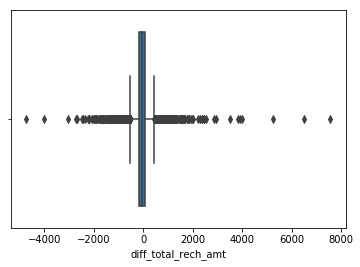

In [77]:
sns.boxplot(master_df_copy['diff_total_rech_amt'])

In [78]:
Q1 = master_df_copy['diff_total_rech_amt'].quantile(0.25)
Q3 = master_df_copy['diff_total_rech_amt'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

250.0


In [79]:
master_df_copy=master_df_copy[~((master_df_copy['diff_total_rech_amt'] < (Q1 - 1.5 * IQR)) |(master_df_copy['diff_total_rech_amt'] > (Q3 + 1.5 * IQR)))]

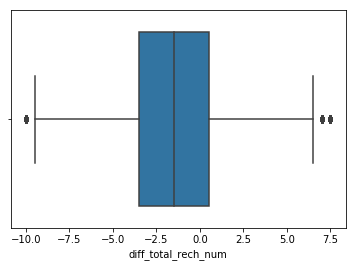

In [80]:
sns.boxplot(master_df_copy['diff_total_rech_num'])

In [81]:
master_df_copy.shape

(18832, 147)

In [82]:
master_df_copy.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  18832.000000  18832.000000  18832.000000  18832.000000  18832.000000   
mean     468.520043    470.092249    434.763097    181.967580    187.670136   
std      291.333762    298.246788    292.452125    311.557002    333.655497   
min     -124.766000   -622.509000    -50.243000      0.000000      0.000000   
25%      273.095250    271.066250    233.952250     12.780000     11.575000   
50%      429.905500    427.899000    399.359500     60.620000     58.200000   
75%      598.476750    599.876250    573.930250    199.280000    200.227500   
max     4497.680000   6726.579000   6020.838000   3829.080000   5329.360000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  18832.000000  18832.000000  18832.000000  18832.000000   18832.000000   
mean     173.165111    283.427447    287.614746    268.676139      10.911402   
std      306.114313    336.859875    353.881795    327.543472      58.268830   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       11.710000     58.275000     56.382500     53.237500       0.000000   
50%       53.330000    173.895000    171.695000    160.250000       0.000000   
75%      182.945000    392.307500    394.890000    373.312500       0.000000   
max     4254.060000   4890.910000   4533.960000   4831.910000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   18832.000000   18832.000000   18832.000000   18832.000000   
mean        8.208526       7.971993      16.471801      12.223505   
std        60.872107      60.458514      70.886862      66.973230   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    1398.230000    1878.860000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   18832.000000      18832.000000      18832.000000      18832.000000   
mean       11.625794         67.261776         68.471086         63.610245   
std        63.641937        146.616281        160.782257        142.020012   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          4.407500          4.340000          4.290000   
50%         0.000000         22.030000         22.190000         20.690000   
75%         0.000000         71.595000         70.860000         67.302500   
max      2237.690000       3411.680000       4692.740000       3780.030000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      18832.000000      18832.000000      18832.000000      18832.000000   
mean         142.466637        144.168821        137.765243          6.291719   
std          193.038520        195.283137        184.588911         19.497994   
min            0.000000          0.000000          0.000000          0.000000   
25%           19.980000         20.125000         19.675000          0.000000   
50%           71.840000         72.295000         68.320000          0.130000   
75%          191.507500        194.795000        188.745000          4.410000   
max         2688.290000       2998.990000       2543.040000        570.430000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      18832.000000      18832.000000      18832.000000      18832.000000   
mean           6.354979          5.928855          1.367921          1.584141   
std           19.920586         18.808068          5.359774          6.495008   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.210000          0.0000

Now can see our dataset which have still few outliers but these item will not impact to much on our analysis. 
We will also use MinMax Scaller which will automatically take care of outliers

In [83]:
master_df=master_df_copy

## EDA

total_rech_data_6    1730.0
total_rech_data_7    1472.0
total_rech_data_8     548.0
dtype: float64


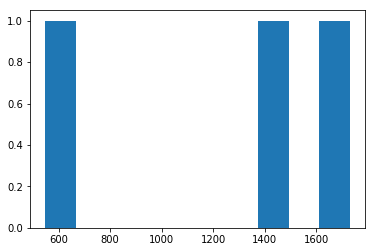

In [84]:
##Lets have a look of recharge data for only churn customers
df=master_df[master_df['churn']==1][['total_rech_data_6','total_rech_data_7','total_rech_data_8']].sum()
print(df)
plt.hist(df)
plt.show()

We can see that for churned customers 6th and 7th month have good uses of total data access but in 8th month its dropped to 1/3rd

total_rech_data_6    33185.0
total_rech_data_7    36566.0
dtype: float64


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([33185. , 33523.1, 33861.2, 34199.3, 34537.4, 34875.5, 35213.6,
        35551.7, 35889.8, 36227.9, 36566. ]),
 <a list of 10 Patch objects>)

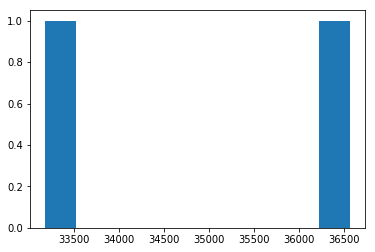

In [85]:
##Lets have a look of recharge data for only non churn customers
df=master_df[master_df['churn']==0][['total_rech_data_6','total_rech_data_7']].sum()
print(df)
plt.hist(df)
#plt.show()

While in non churned customers data uses are approx same whether its for 6th, 7th or 8th months

total_og_mou_6    8196481.47
total_og_mou_7    8457423.71
total_og_mou_8    7893374.16
dtype: float64


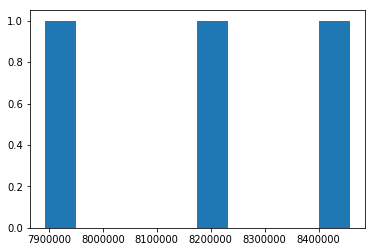

In [86]:
#Lets look in total outgoing calls which customer doing
#First look on non churned customers
df=master_df[master_df['churn']==0][['total_og_mou_6','total_og_mou_7','total_og_mou_8']].sum()
print(df)
plt.hist(df)
plt.show()

total_og_mou_6    231815.63
total_og_mou_7    246461.89
total_og_mou_8    171319.45
dtype: float64


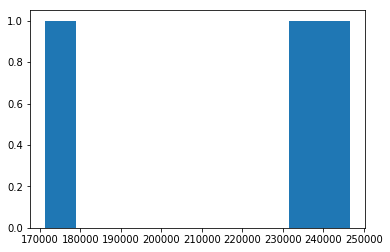

In [87]:
#Now lets havelook on churned customers
df=master_df[master_df['churn']==1][['total_og_mou_6','total_og_mou_7','total_og_mou_8']].sum()
print(df)
plt.hist(df)
plt.show()

(array([1.8168e+04, 5.4100e+02, 8.2000e+01, 2.1000e+01, 5.0000e+00,
        6.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([    0. ,  3169.1,  6338.2,  9507.3, 12676.4, 15845.5, 19014.6,
        22183.7, 25352.8, 28521.9, 31691. ]),
 <a list of 10 Patch objects>)

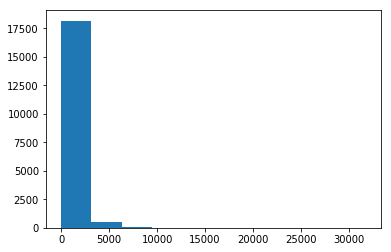

In [88]:
plt.hist(master_df['total_rch_amt_data_calling_6'])

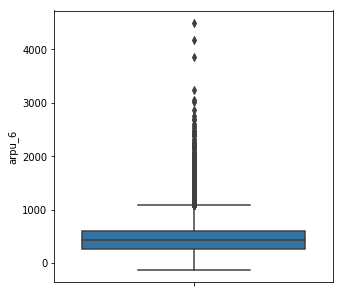

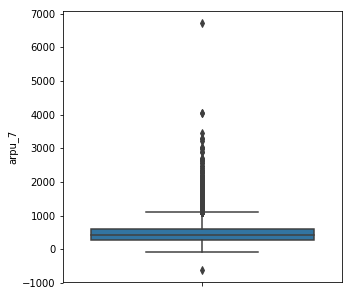

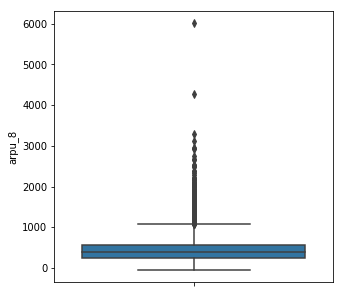

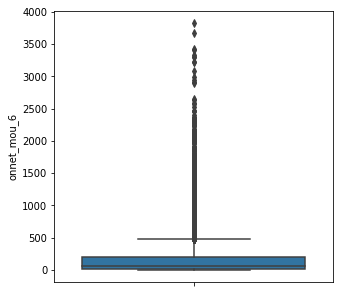

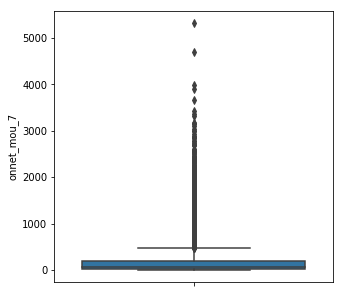

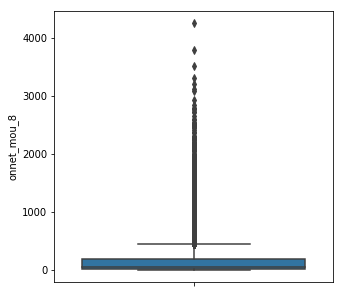

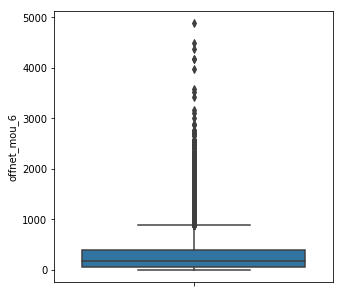

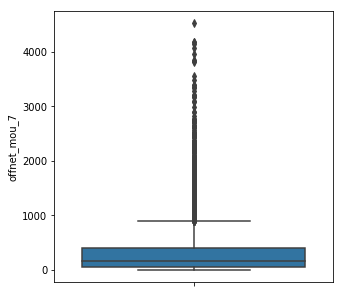

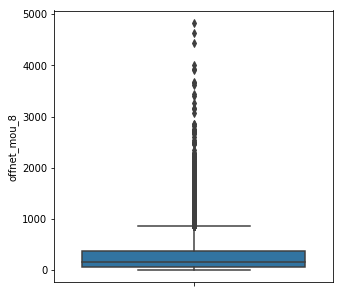

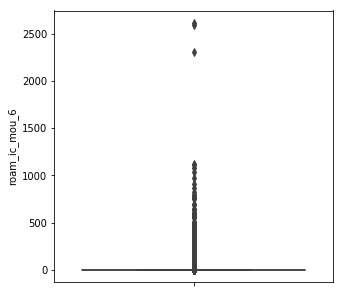

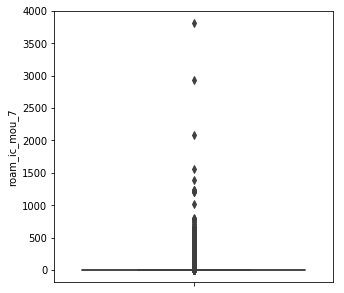

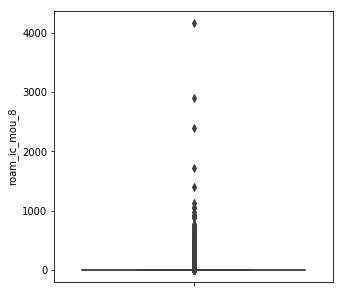

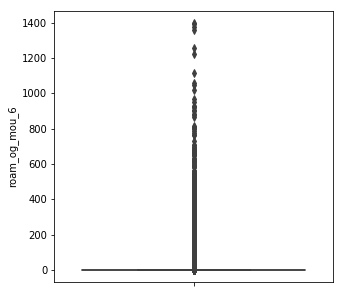

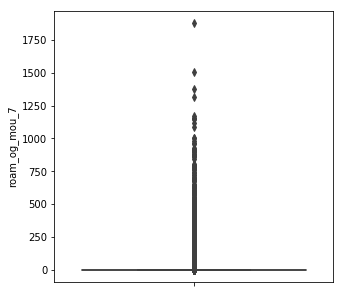

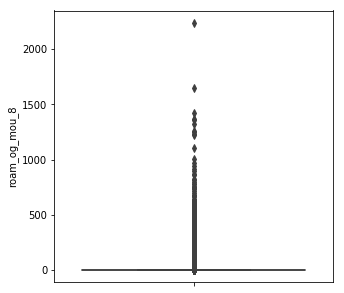

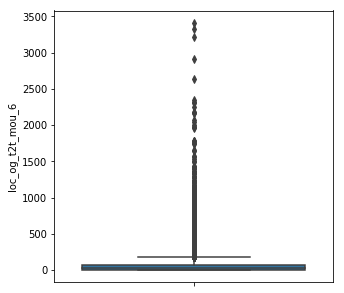

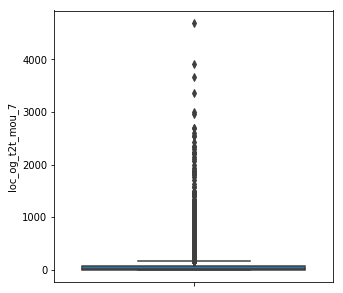

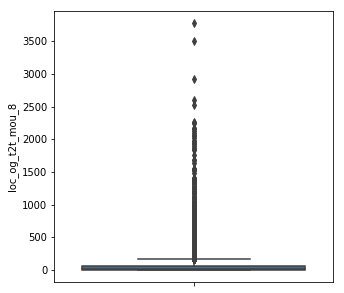

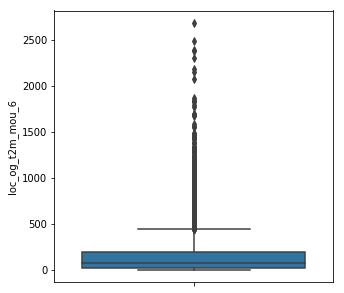

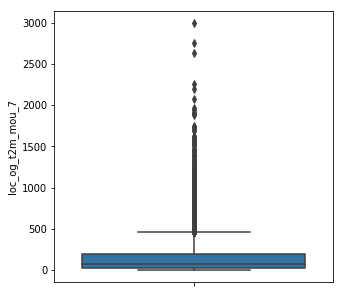

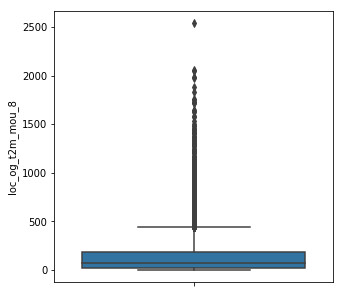

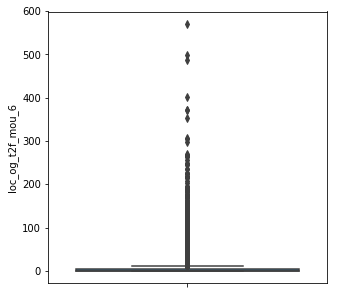

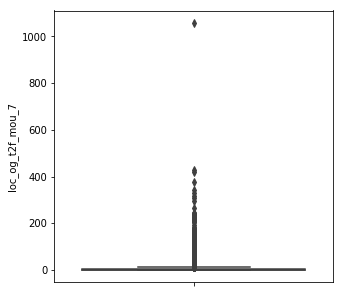

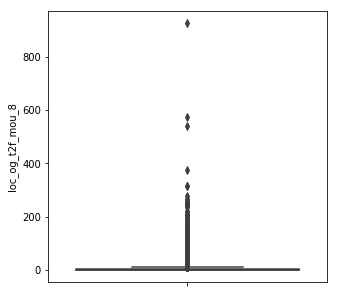

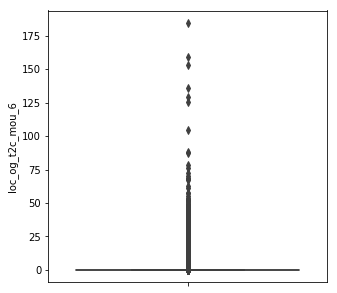

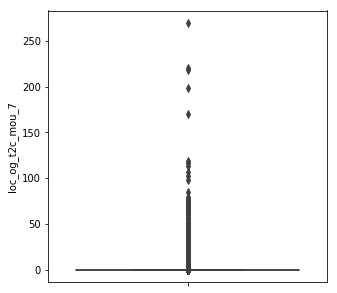

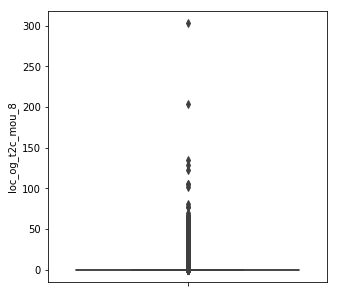

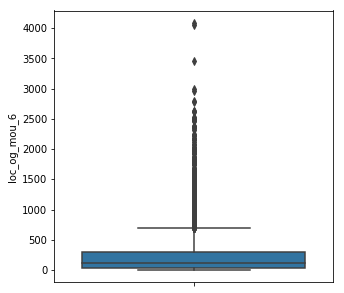

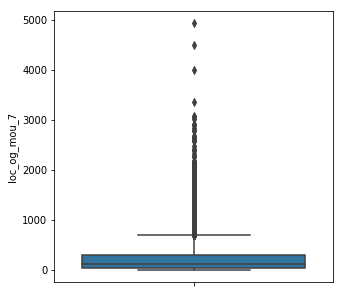

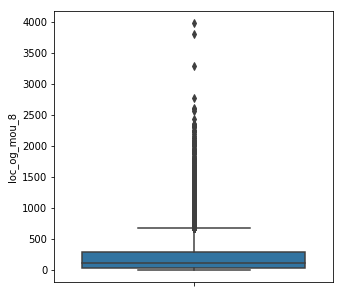

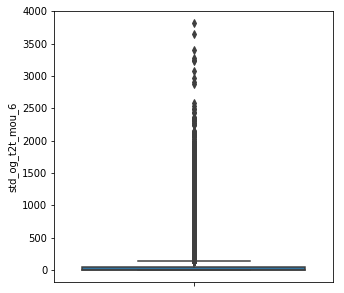

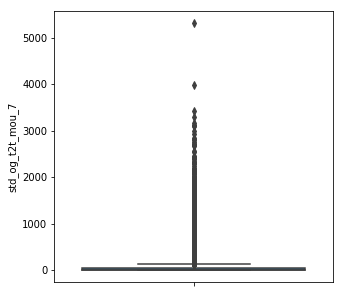

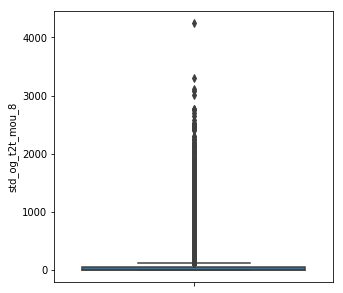

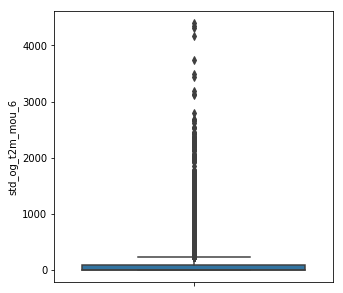

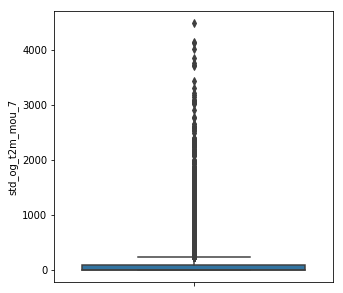

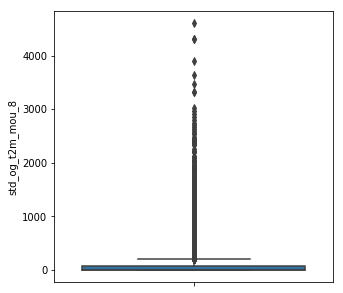

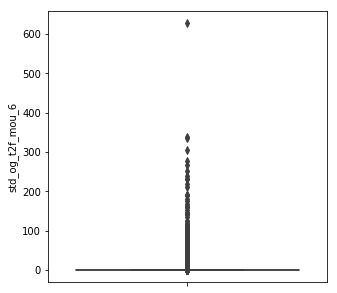

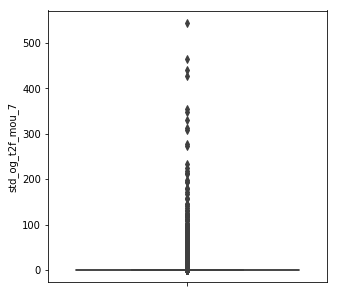

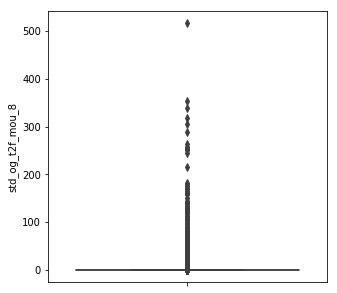

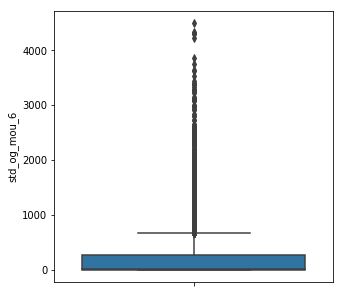

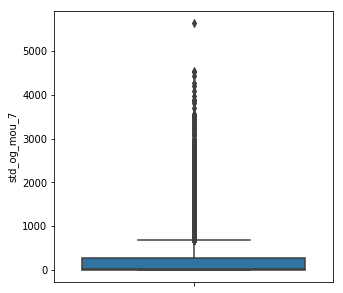

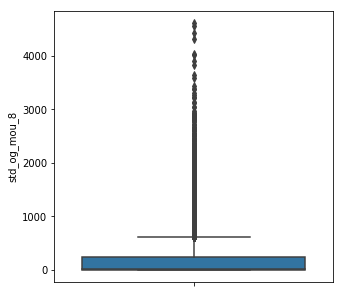

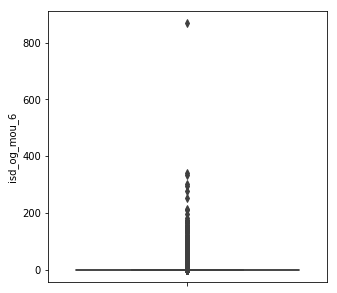

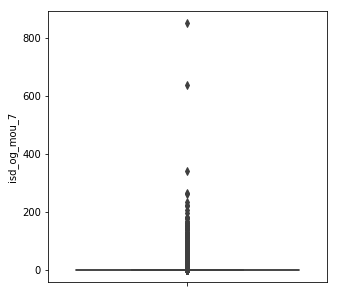

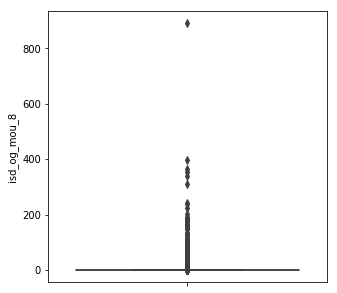

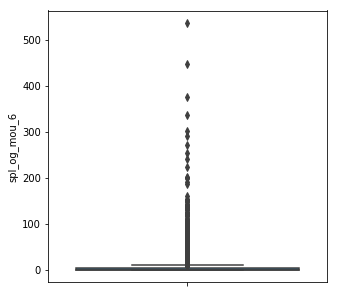

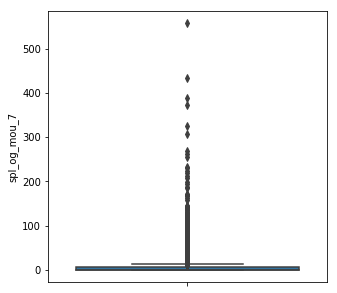

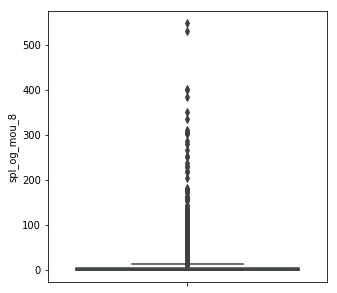

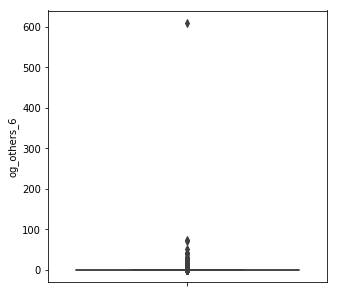

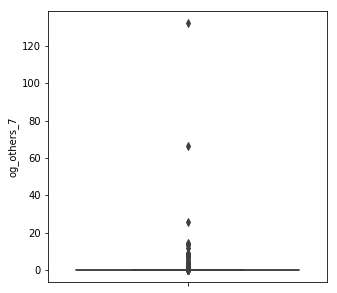

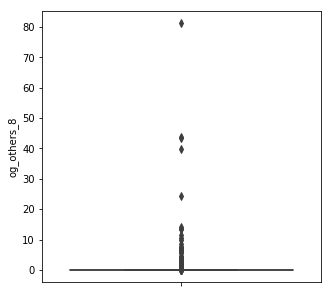

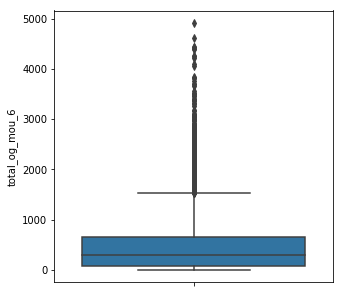

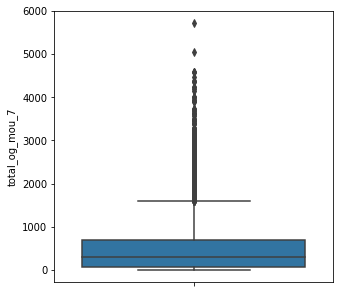

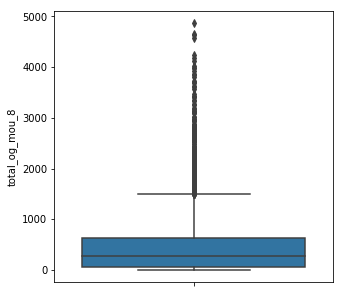

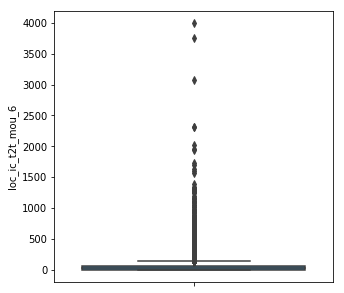

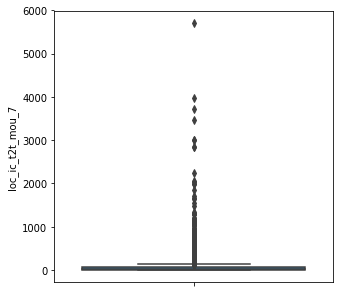

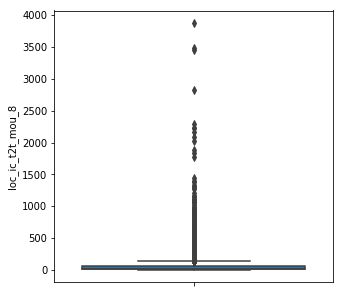

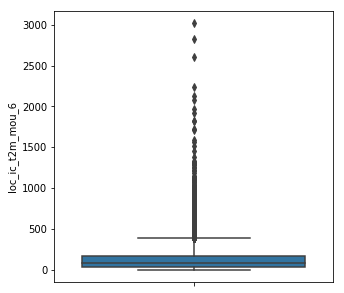

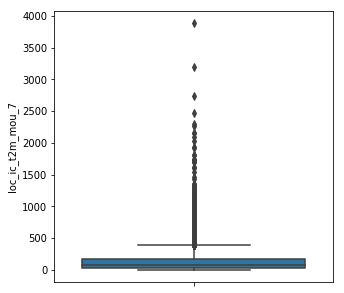

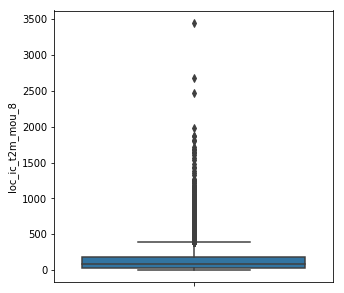

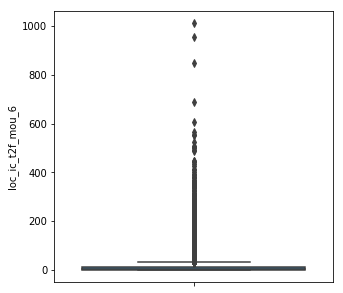

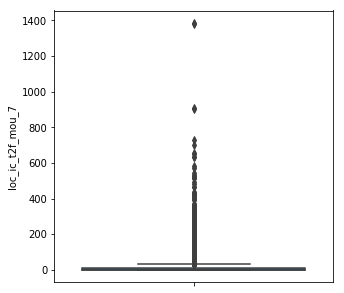

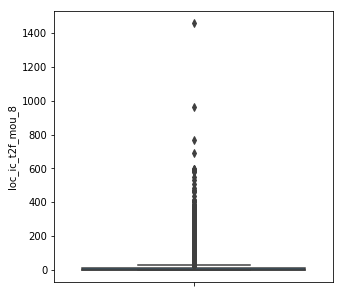

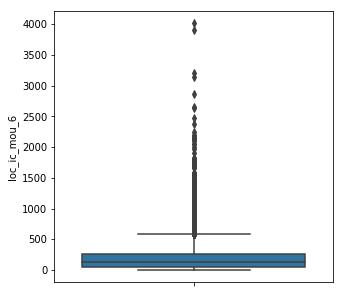

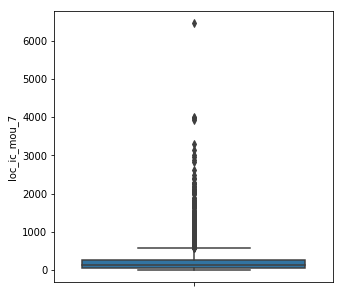

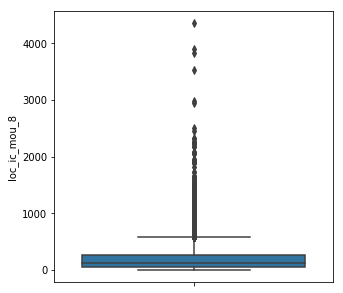

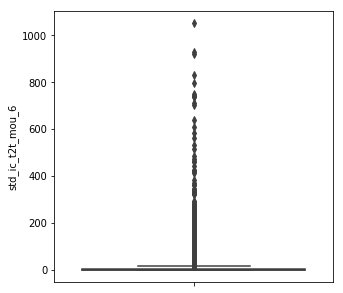

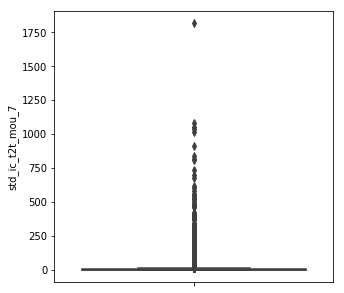

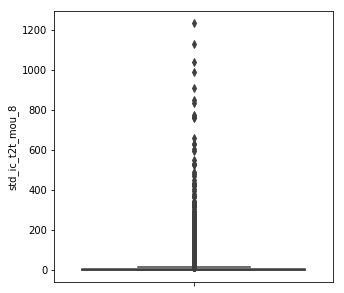

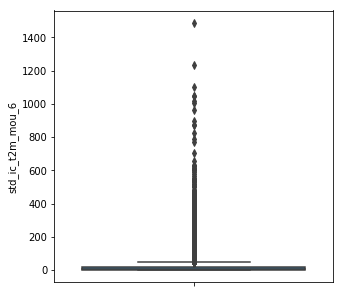

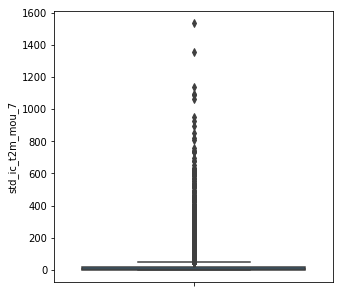

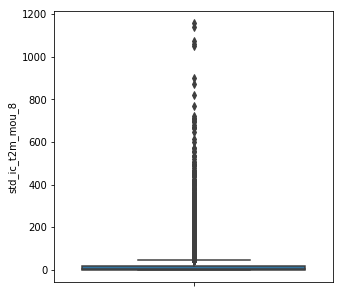

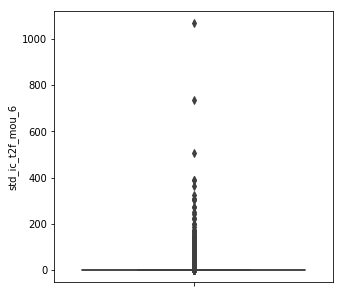

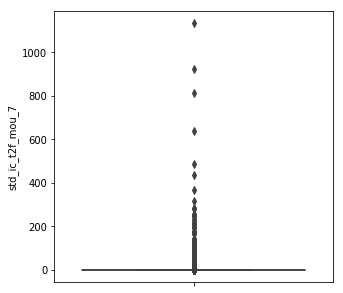

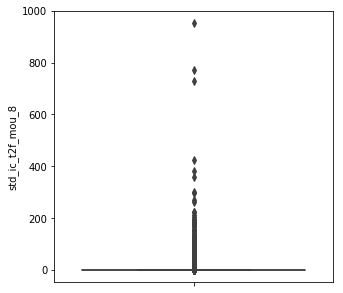

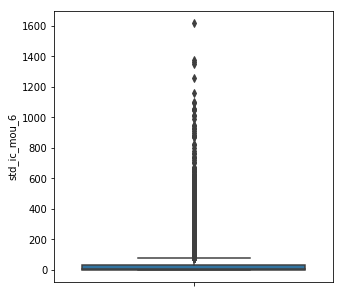

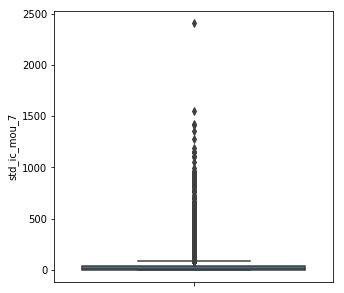

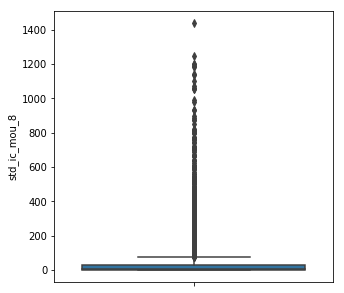

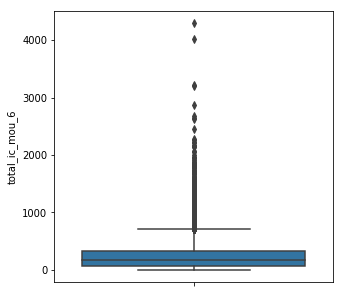

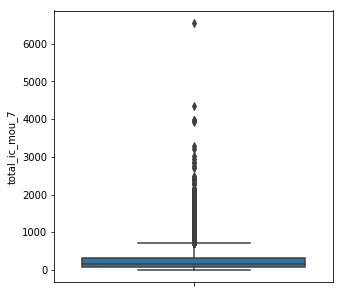

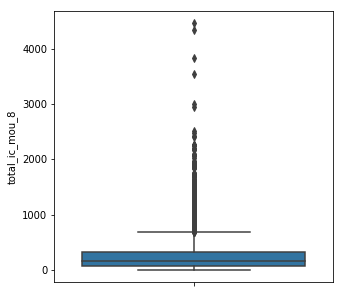

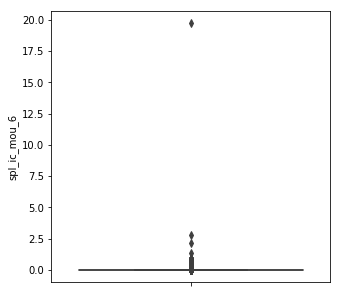

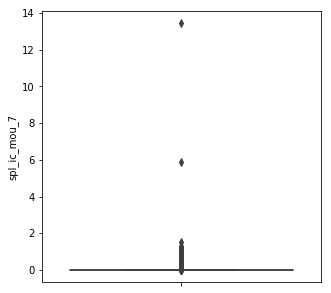

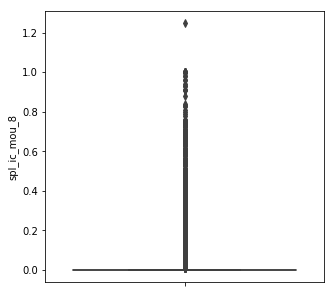

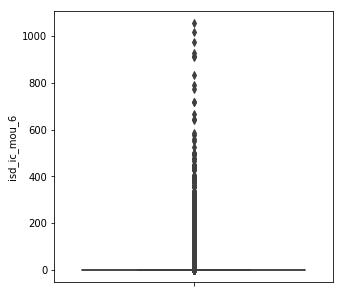

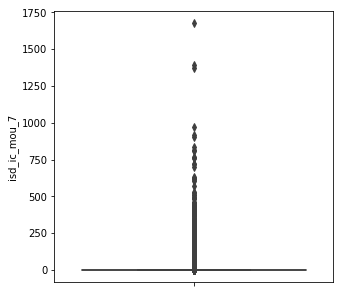

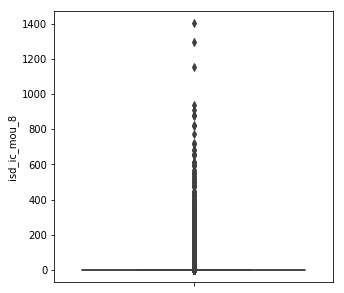

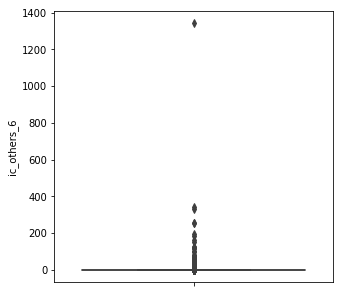

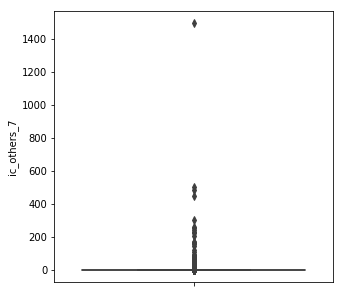

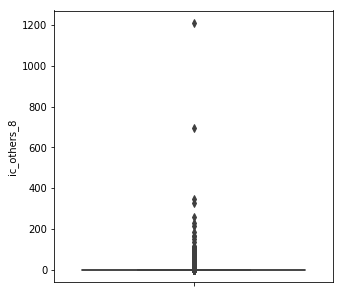

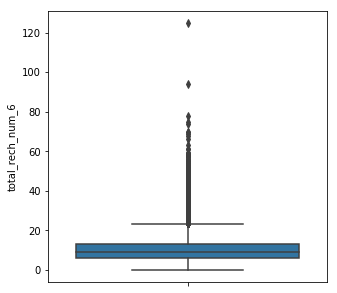

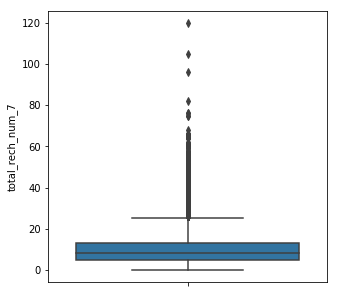

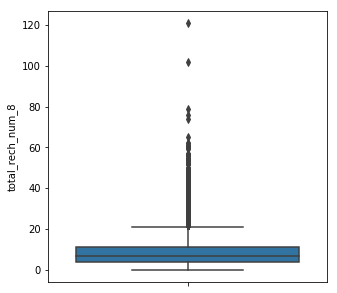

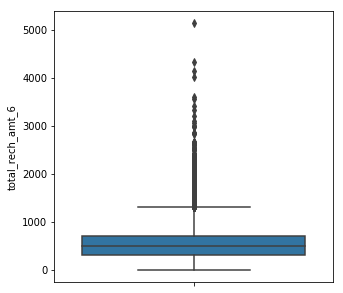

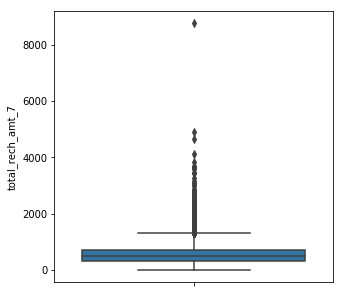

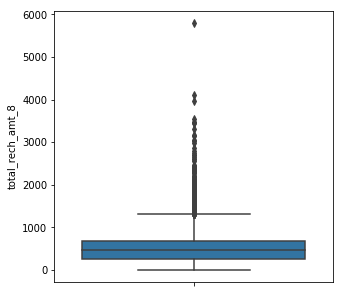

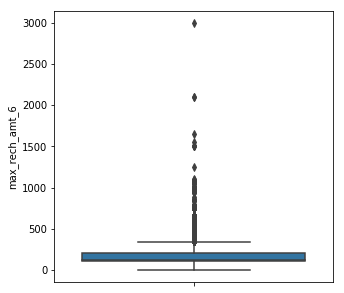

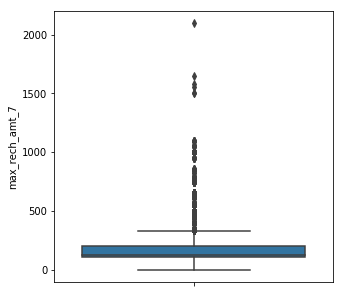

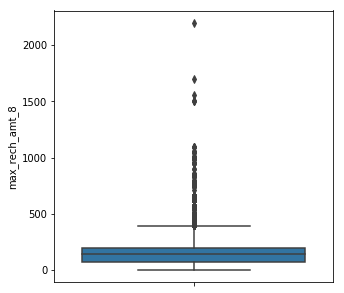

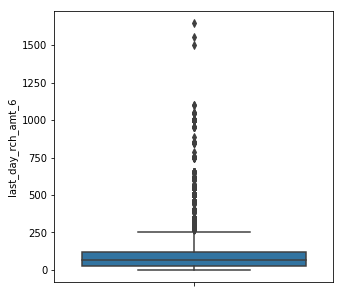

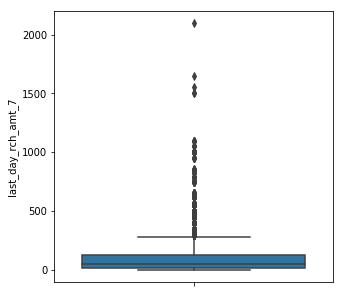

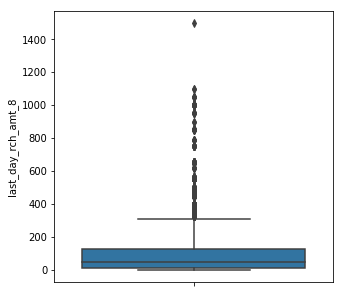

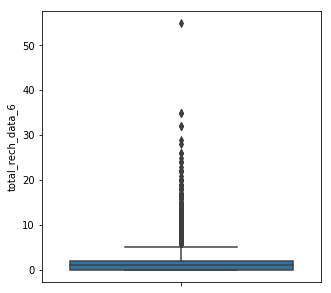

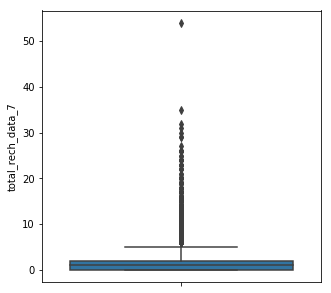

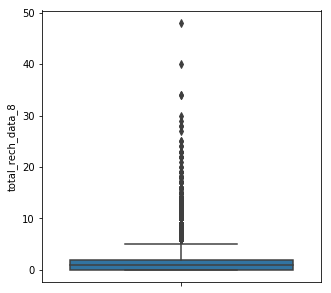

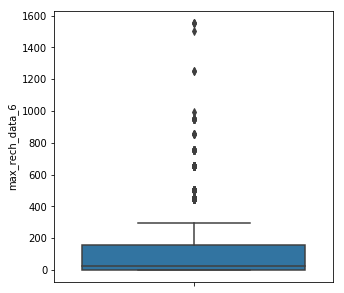

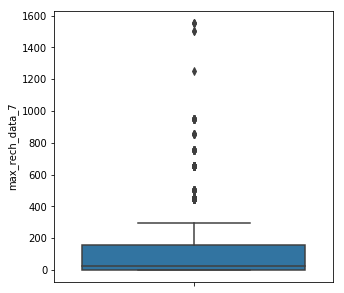

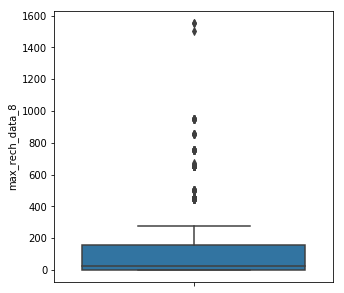

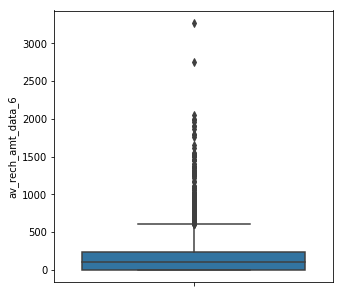

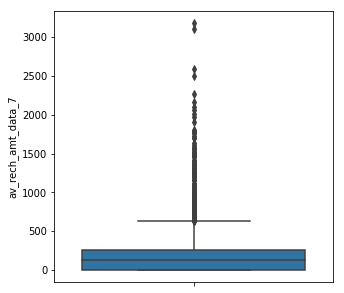

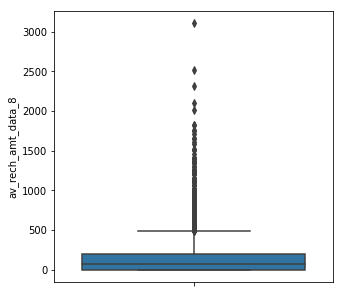

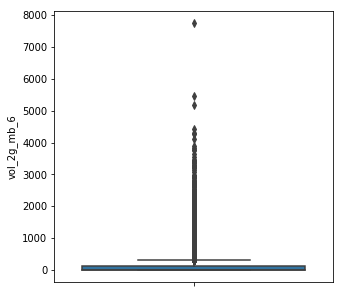

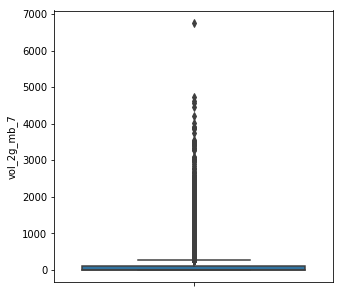

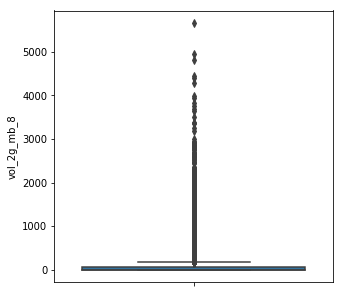

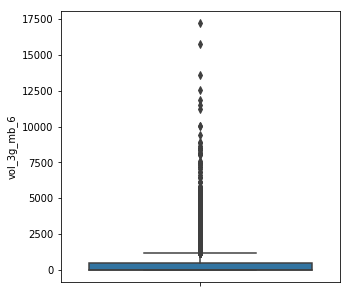

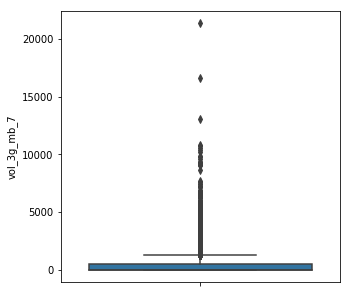

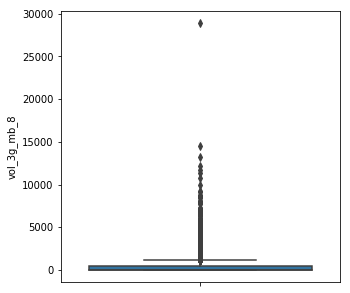

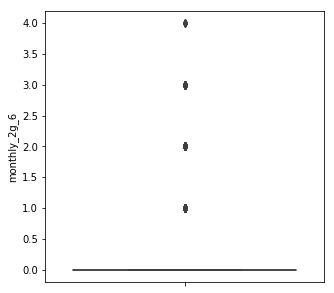

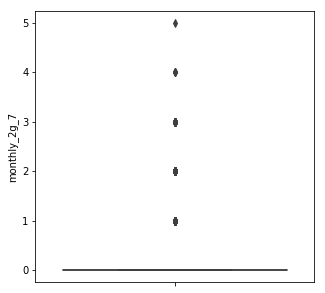

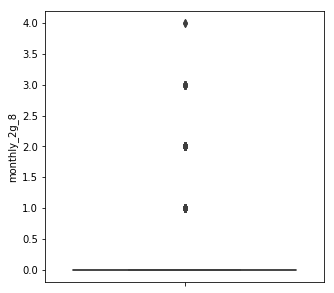

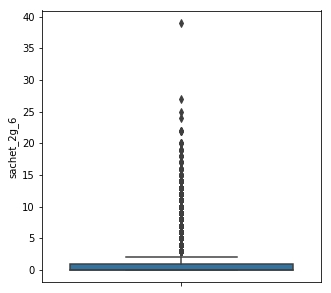

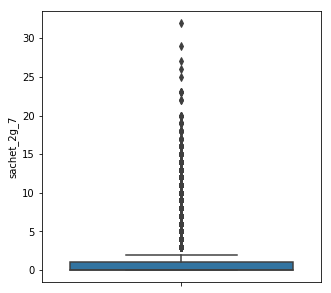

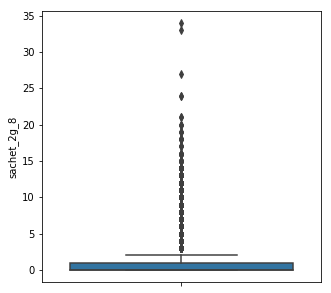

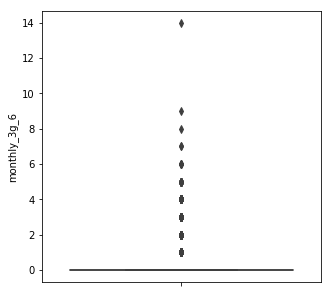

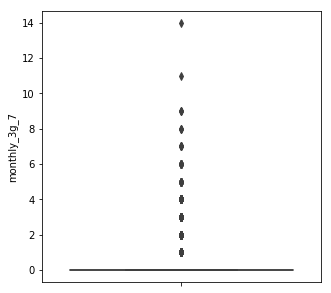

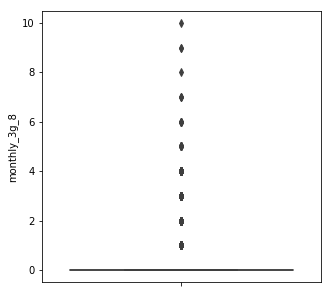

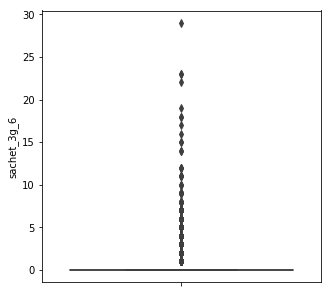

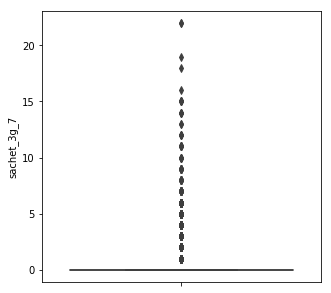

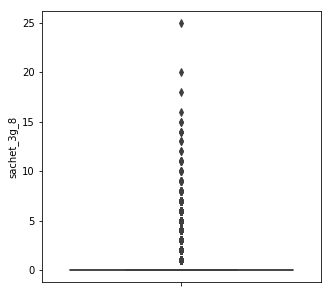

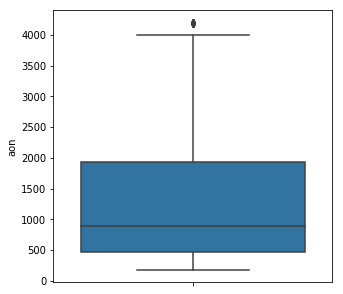

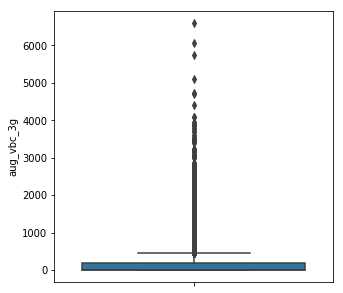

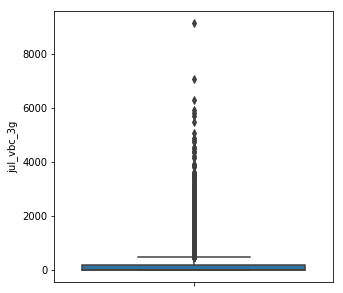

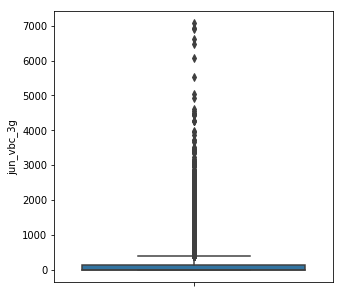

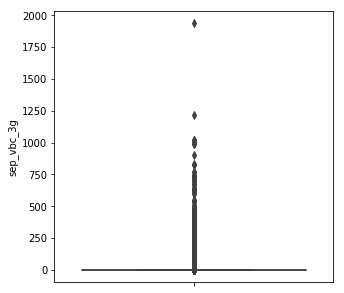

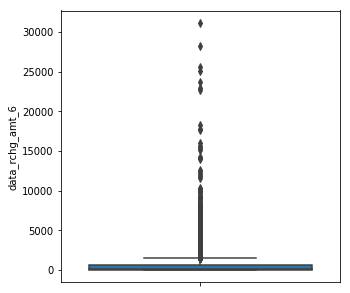

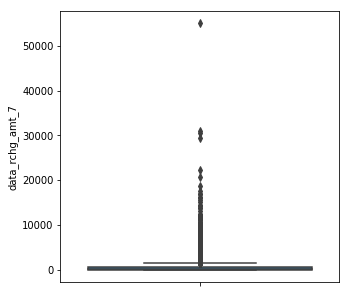

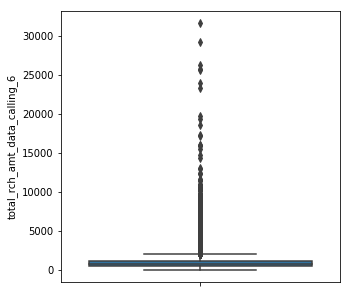

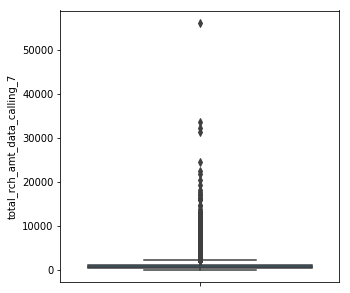

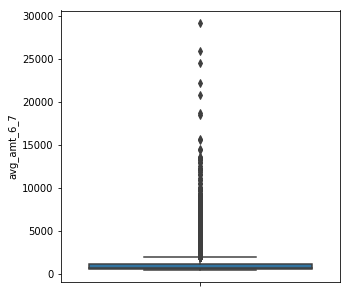

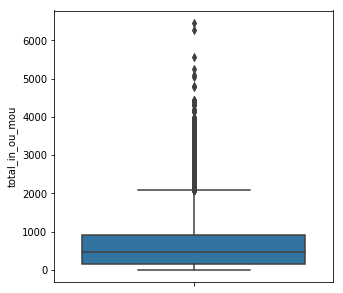

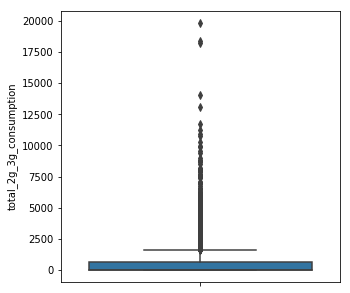

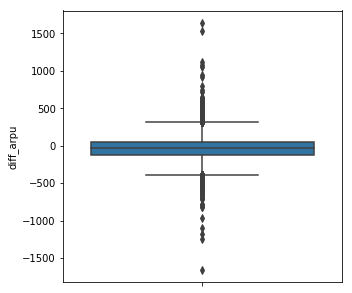

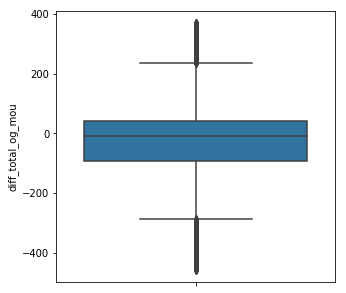

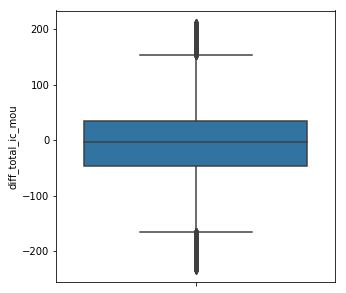

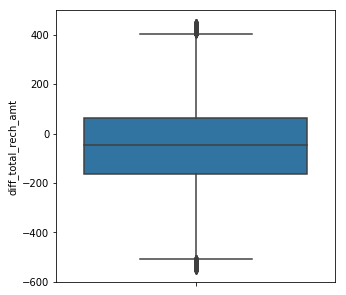

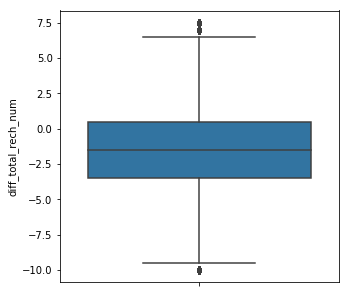

In [89]:
#Univariate analysis
##Lets have a look of recharge data for 6,7 and 8 months
cols=master_df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
num_cols = [col for col in cols if col not in ['churn']]
for col in num_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=master_df)

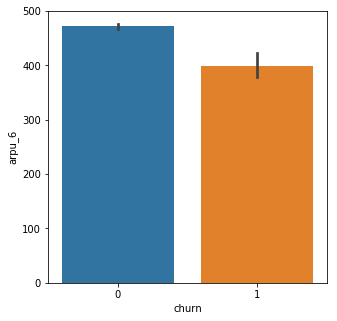

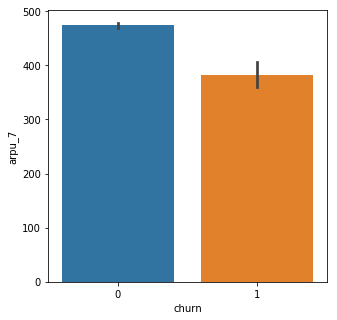

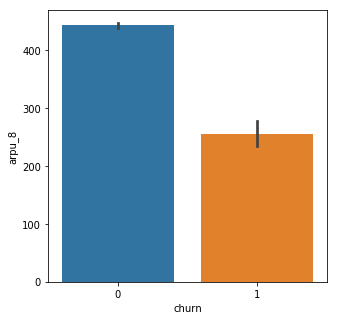

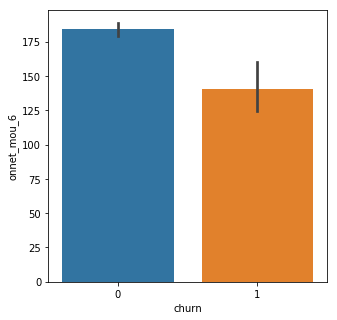

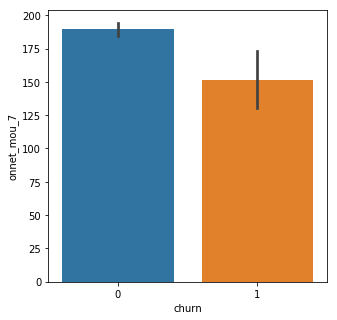

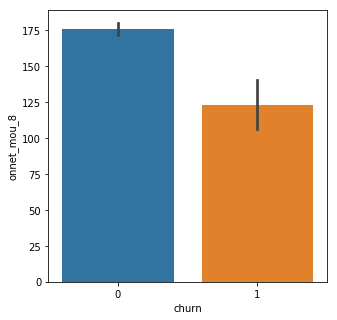

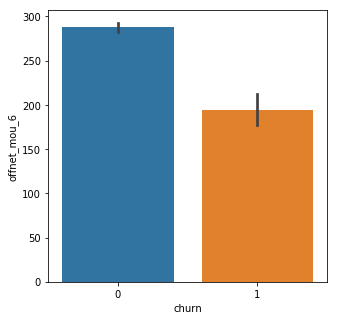

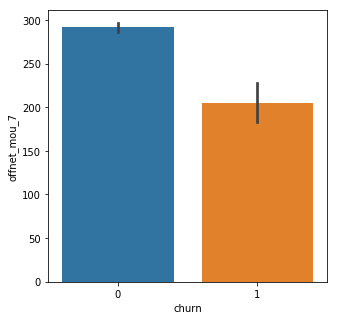

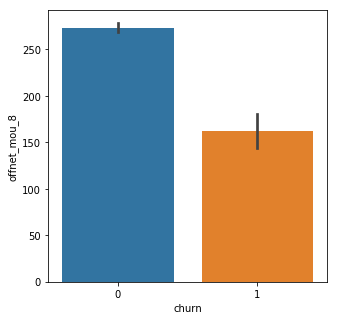

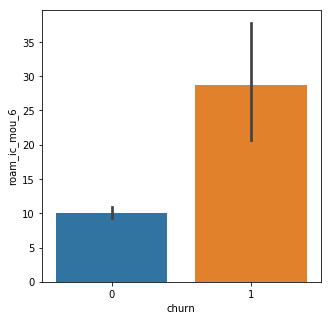

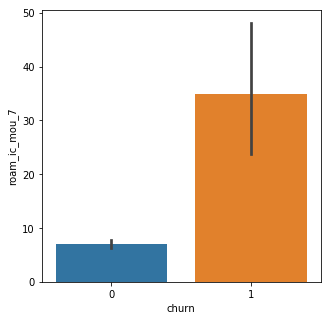

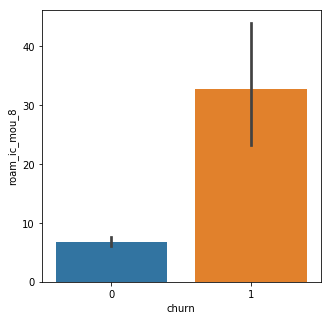

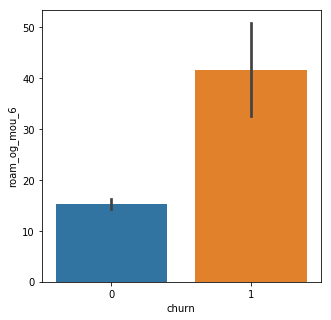

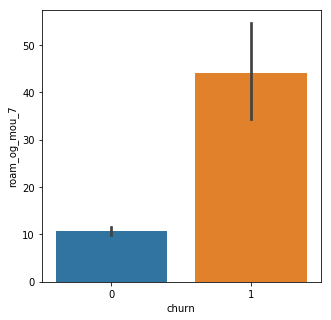

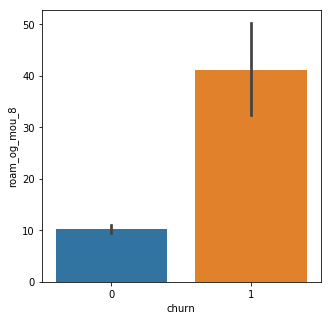

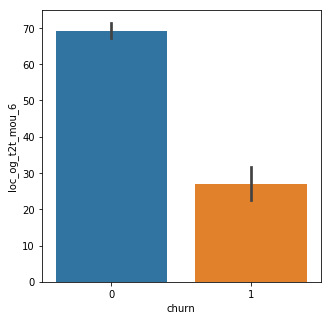

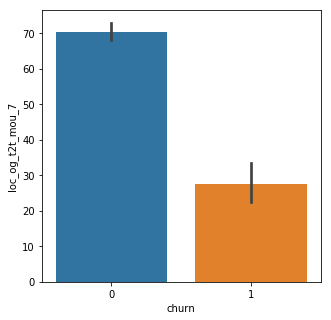

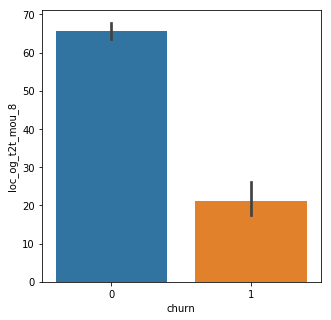

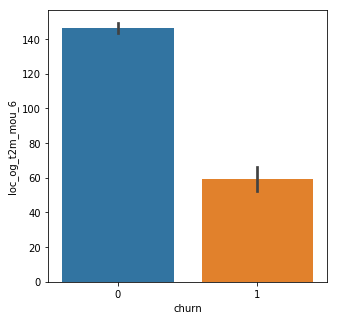

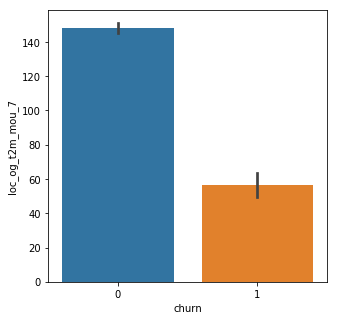

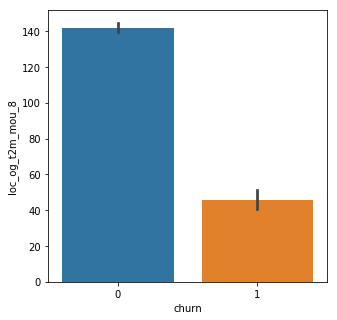

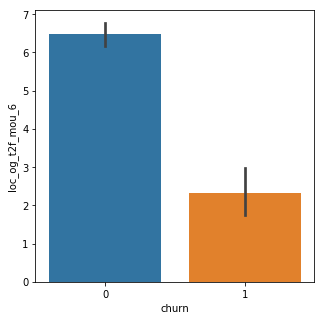

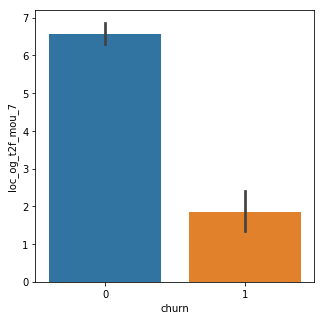

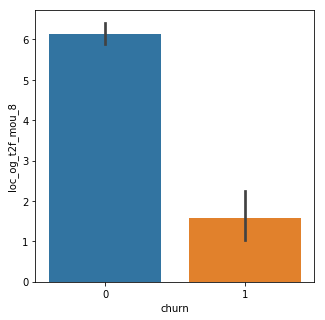

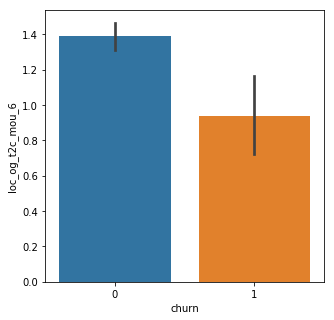

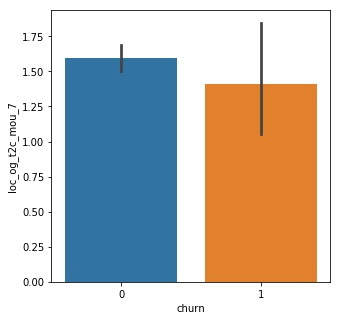

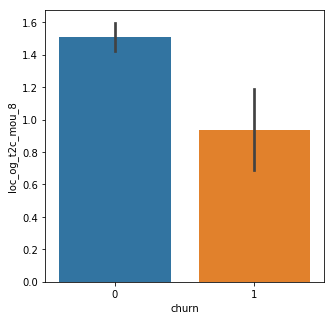

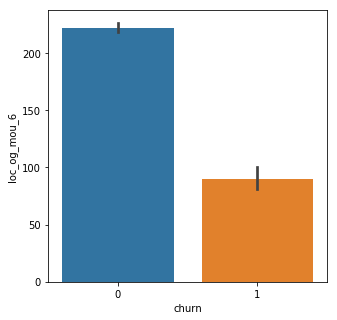

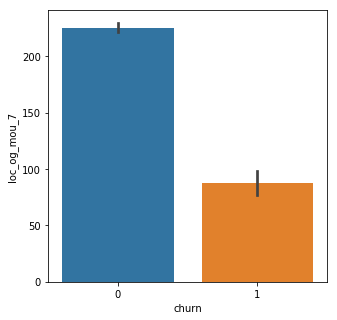

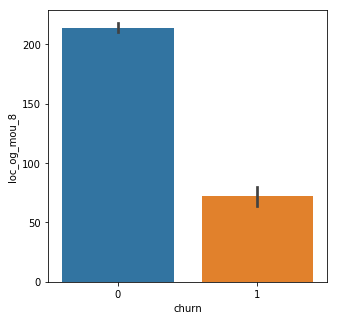

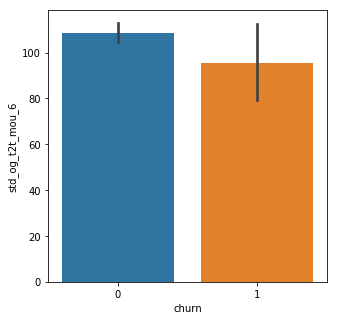

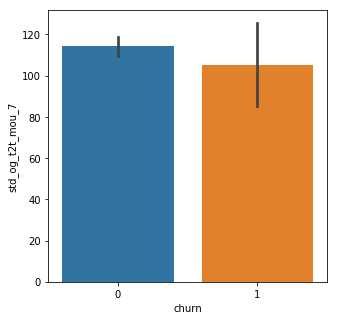

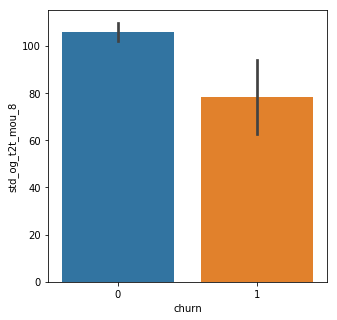

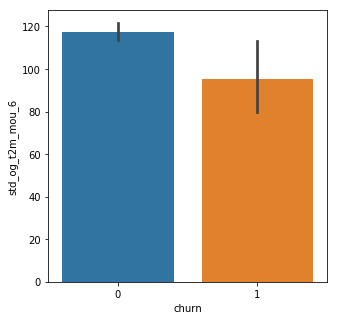

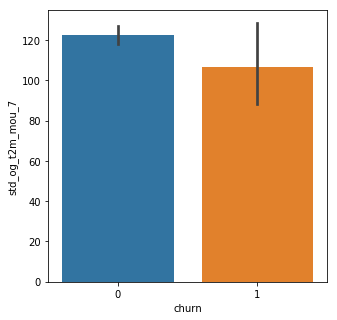

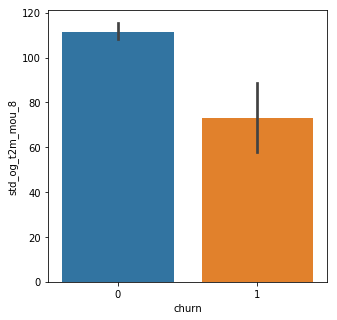

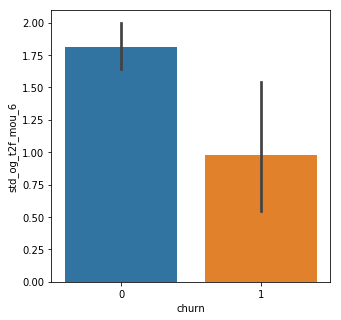

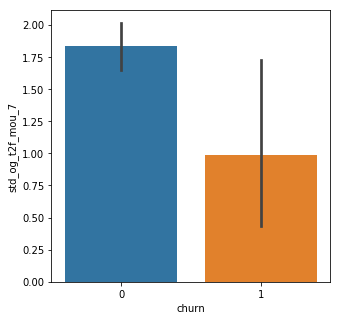

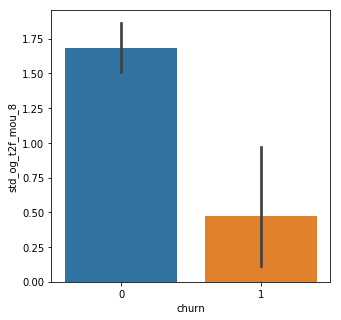

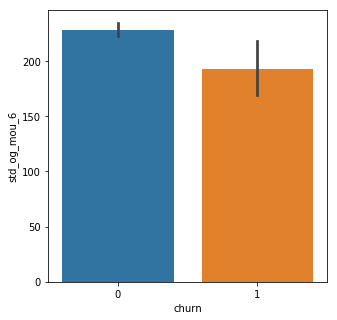

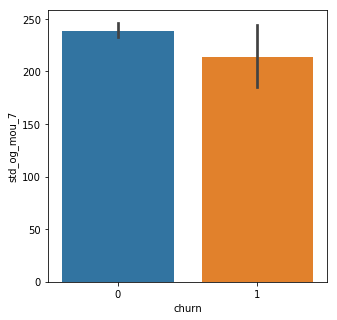

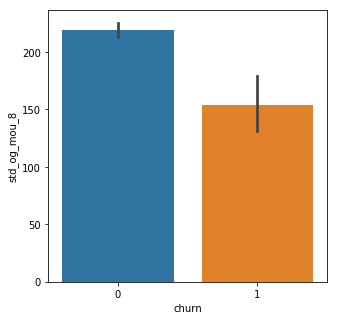

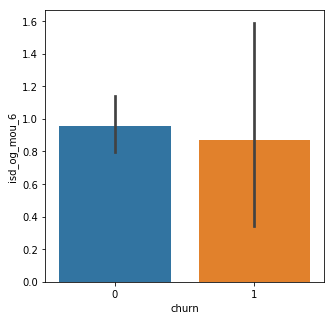

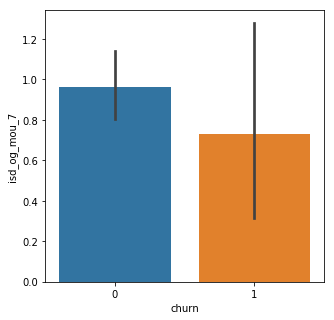

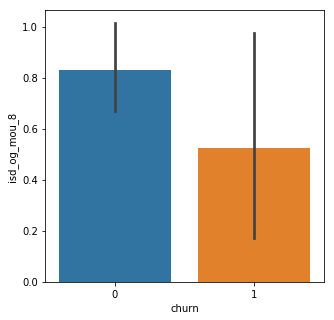

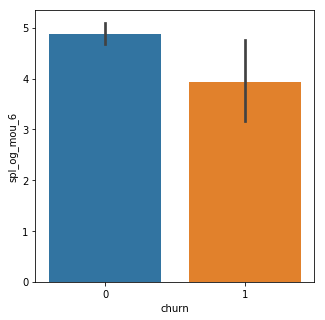

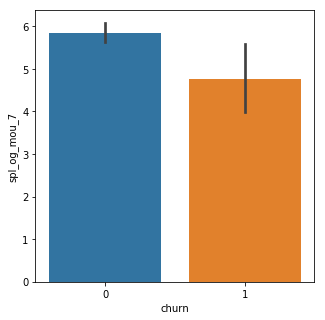

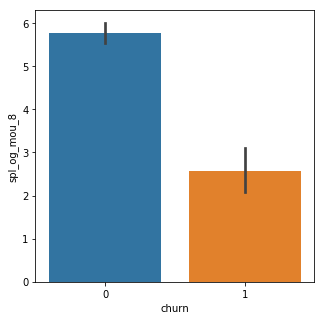

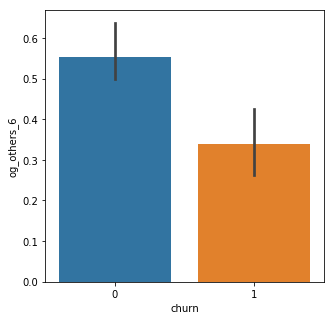

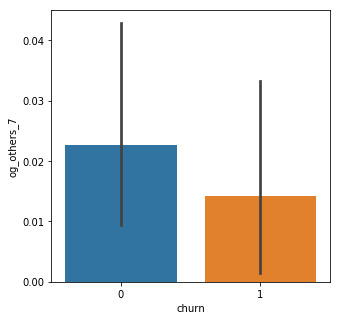

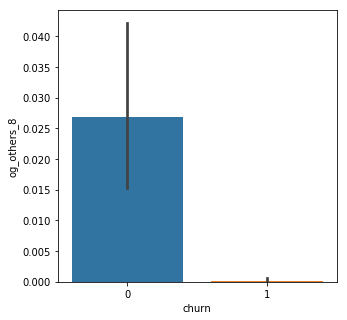

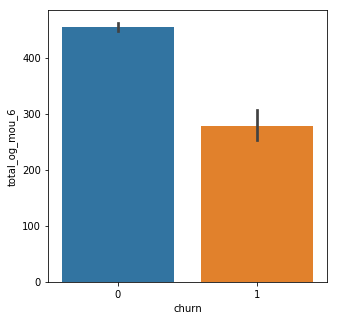

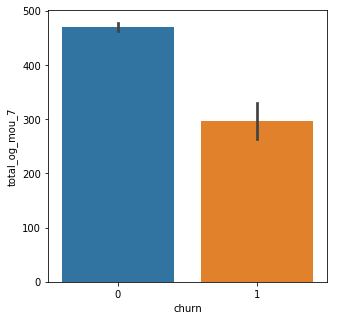

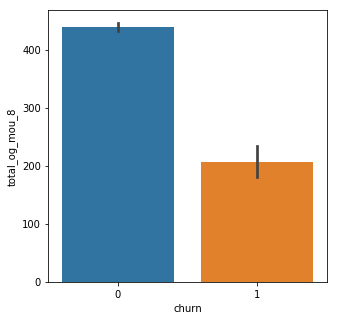

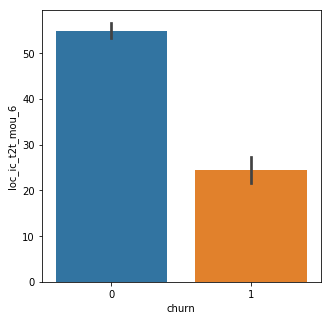

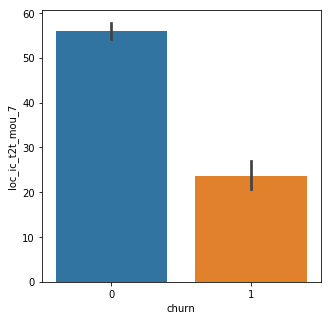

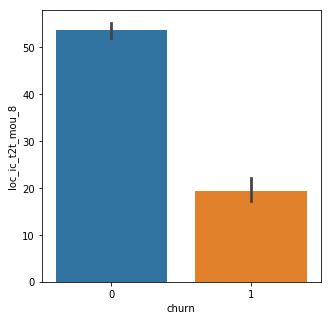

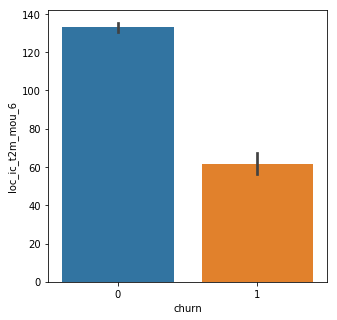

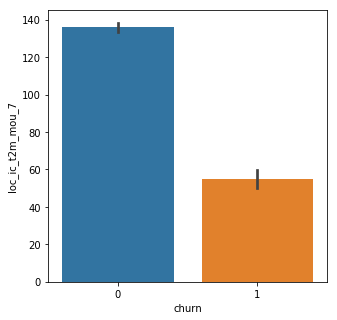

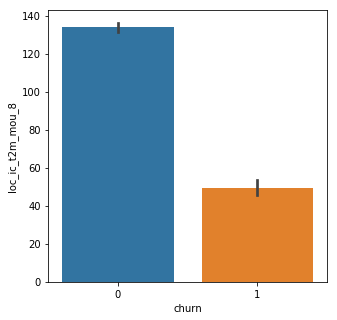

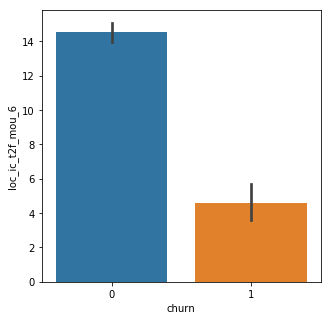

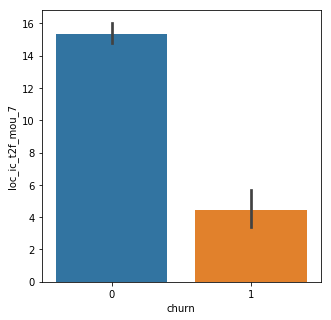

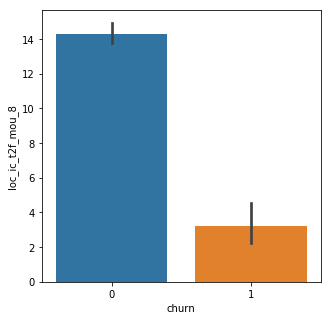

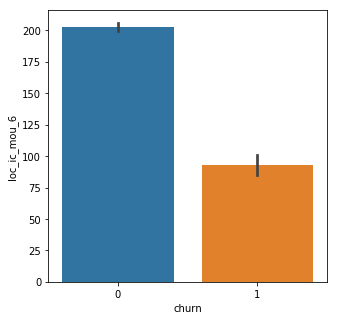

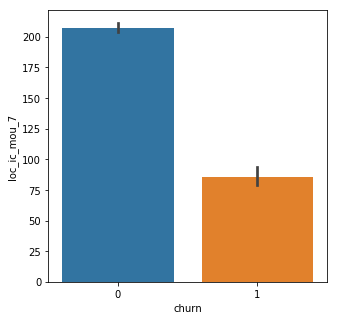

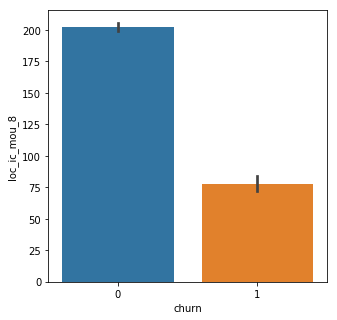

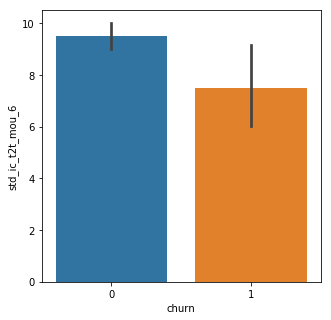

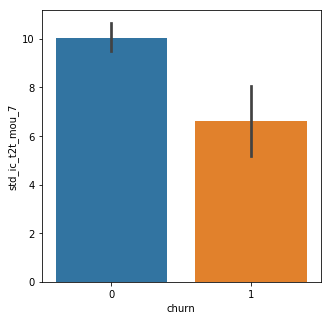

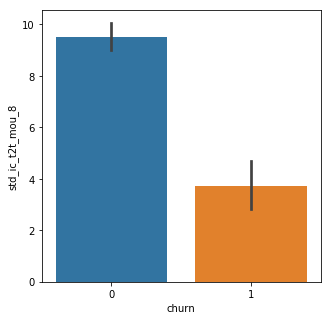

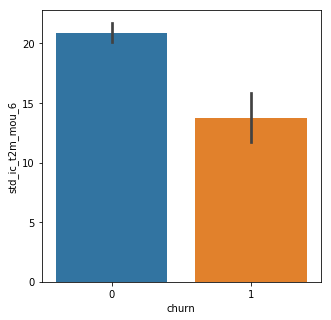

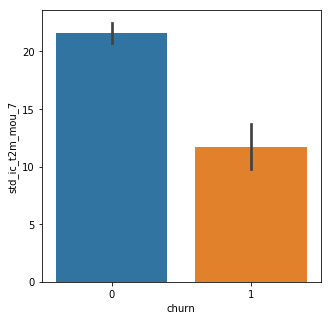

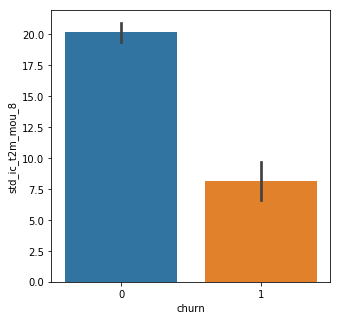

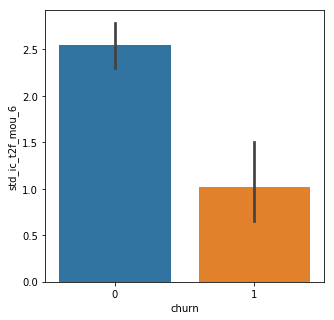

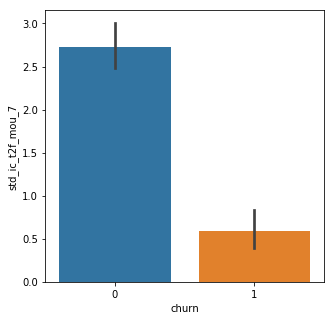

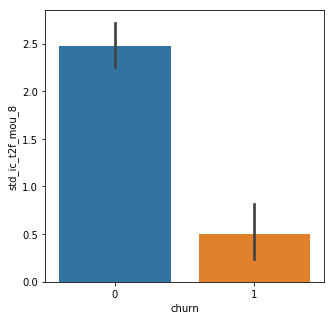

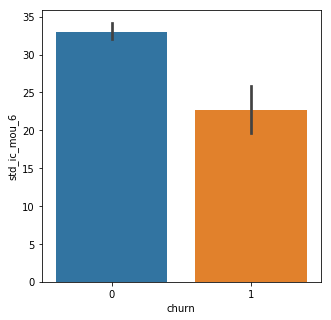

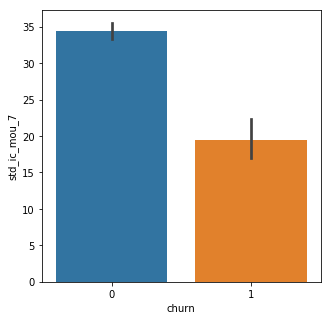

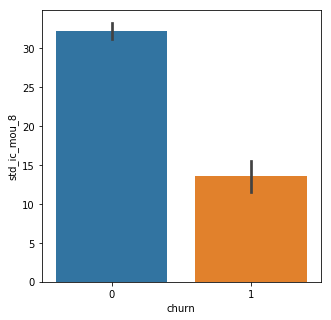

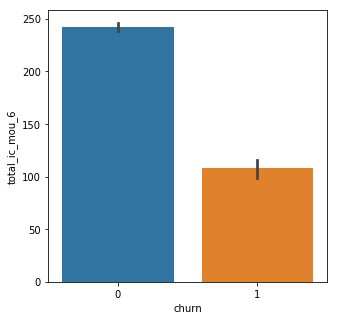

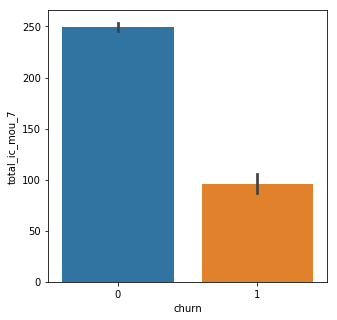

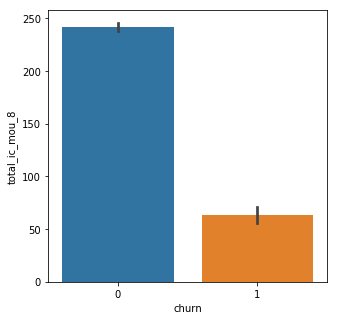

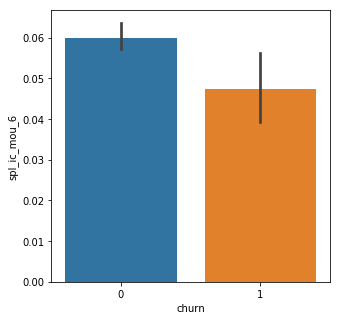

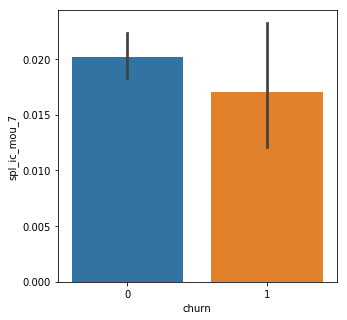

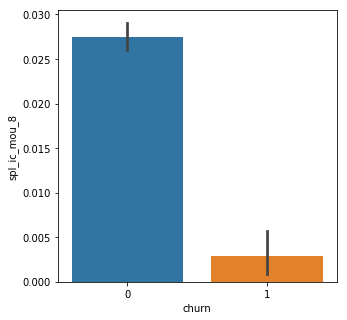

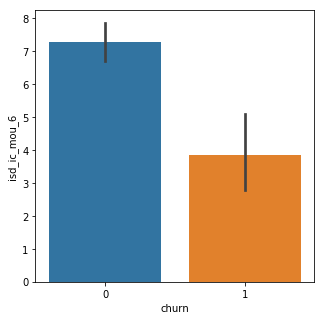

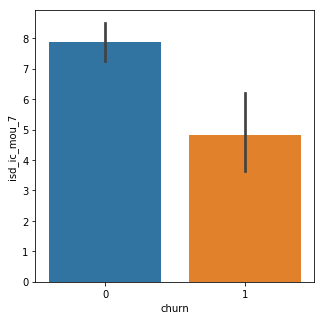

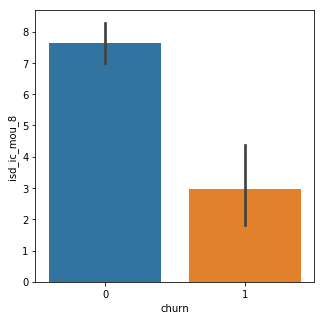

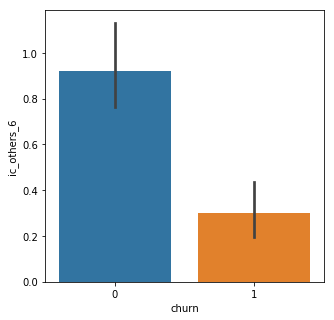

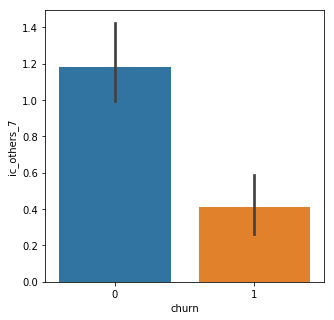

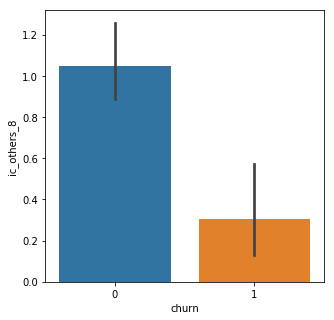

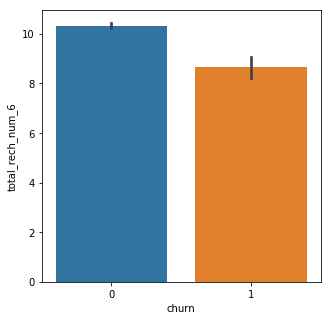

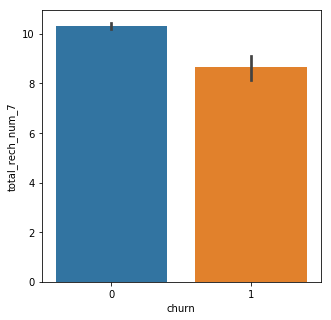

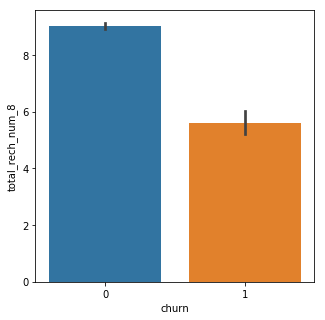

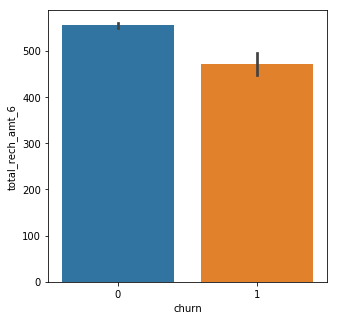

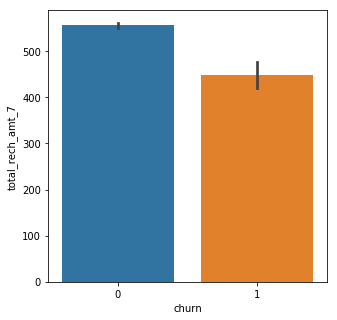

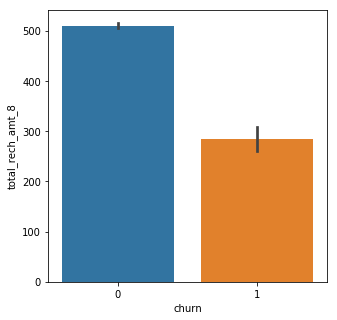

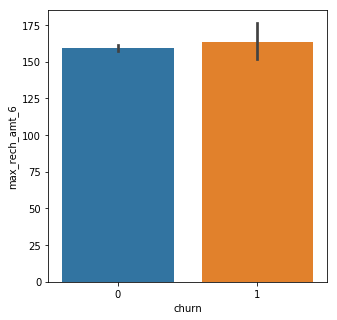

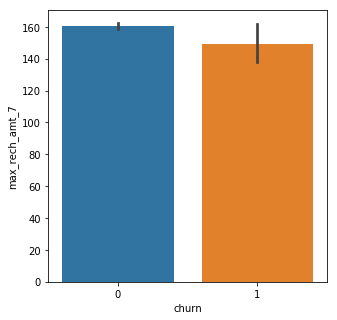

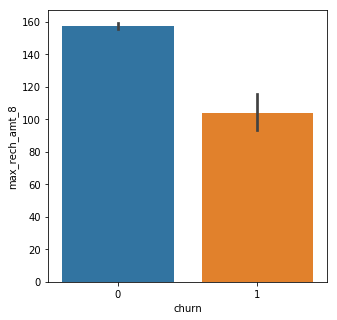

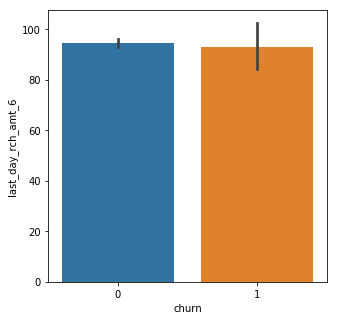

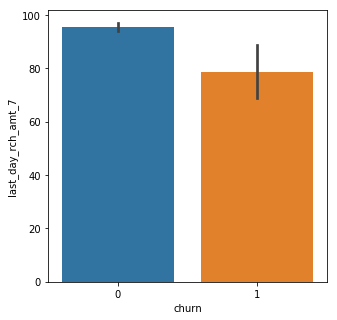

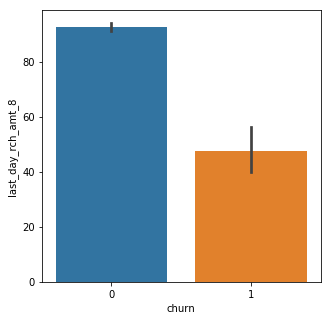

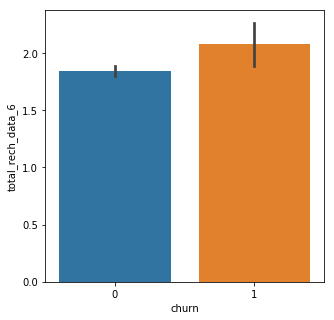

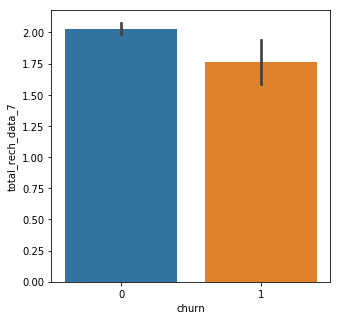

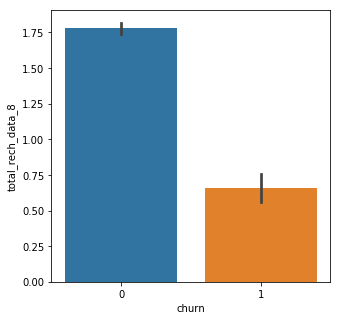

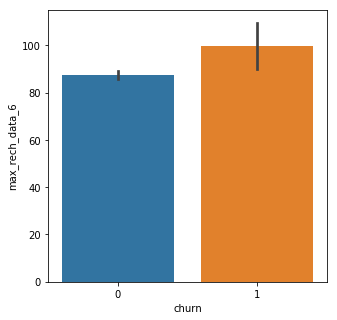

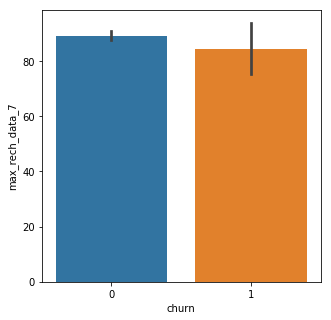

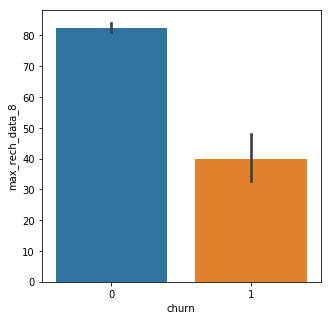

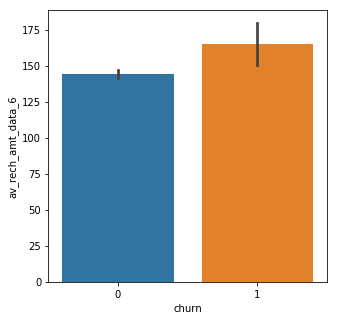

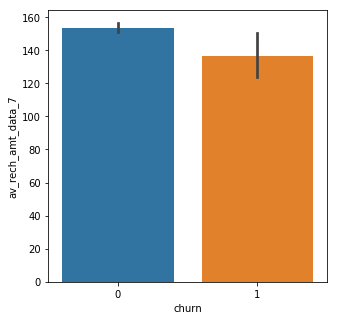

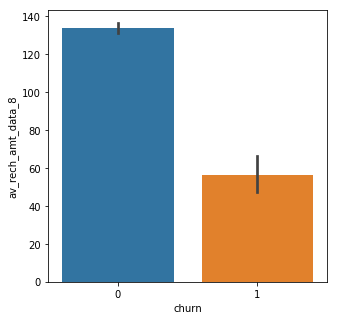

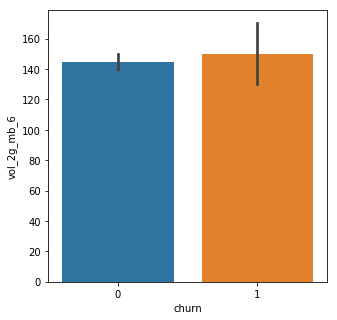

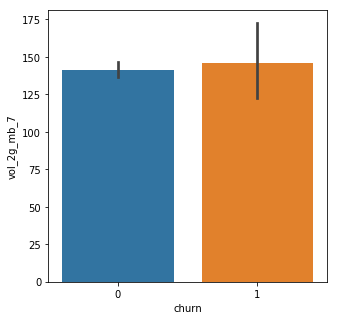

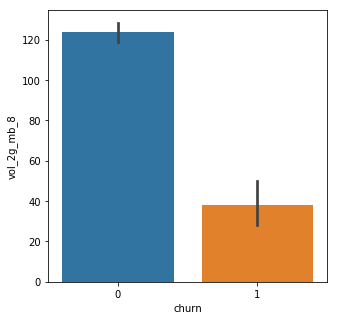

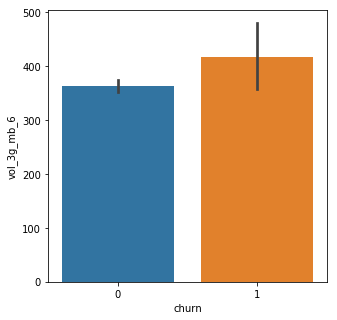

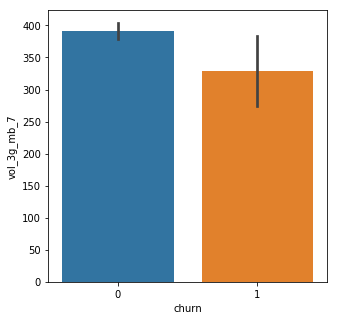

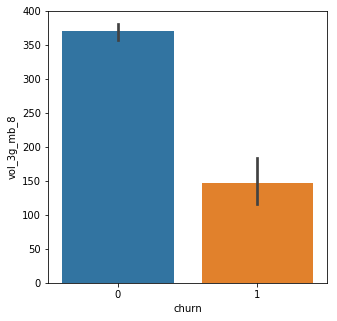

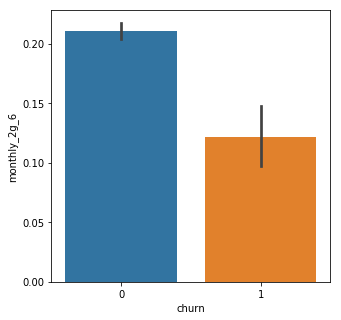

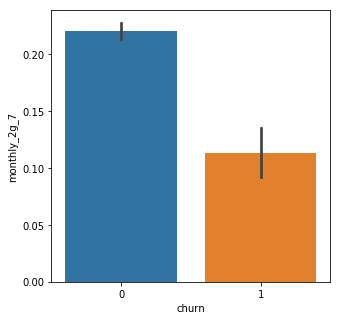

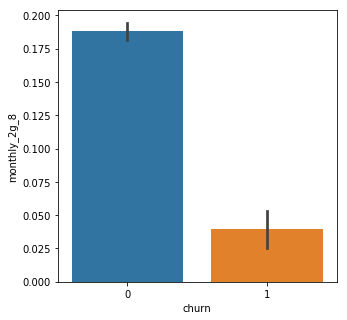

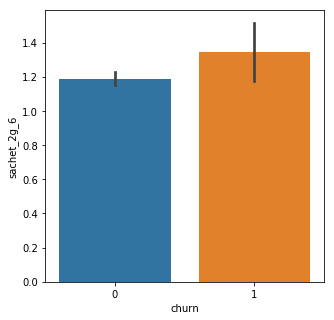

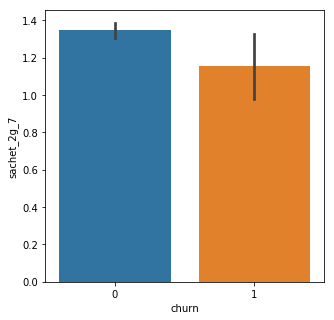

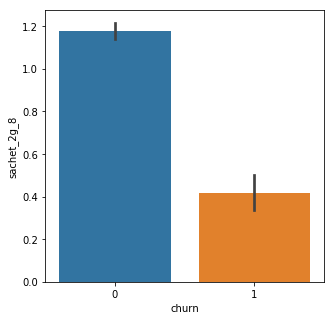

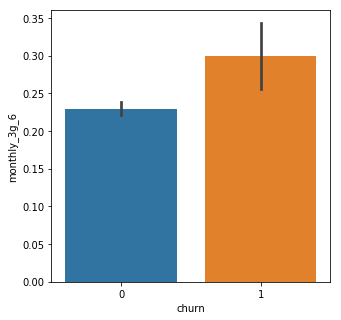

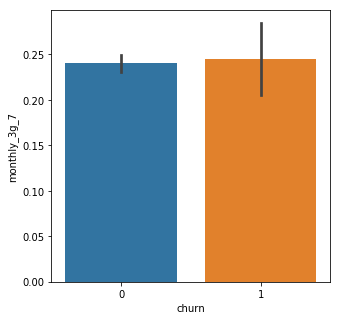

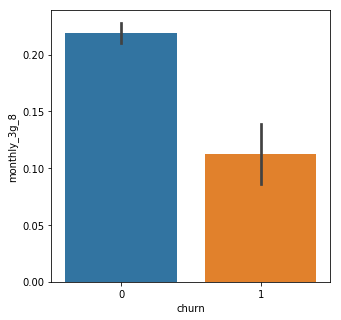

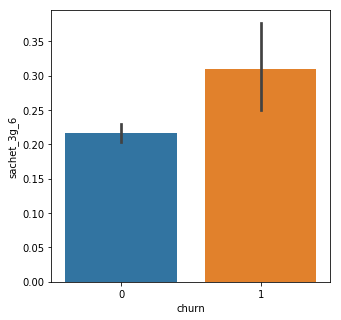

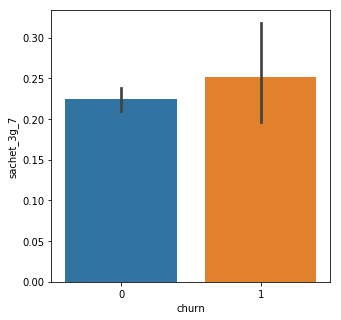

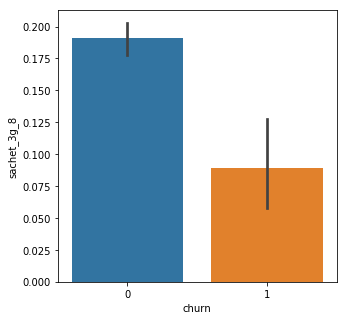

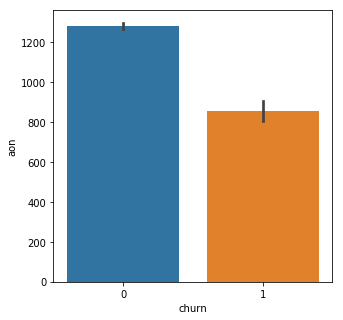

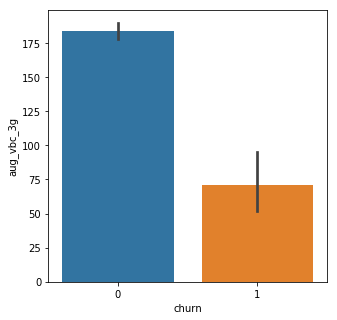

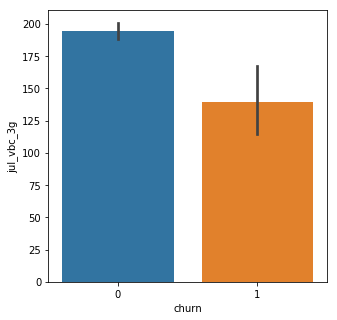

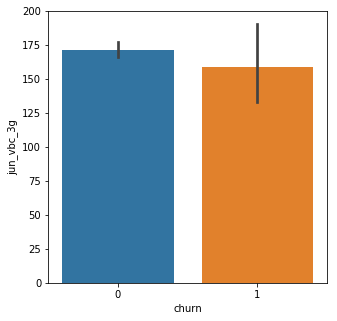

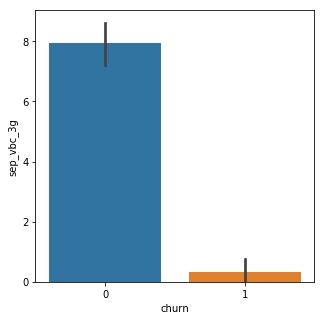

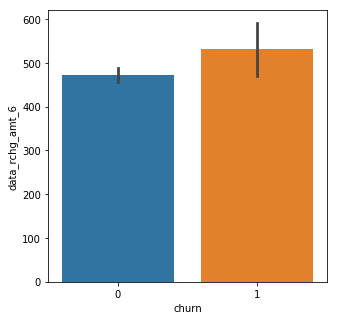

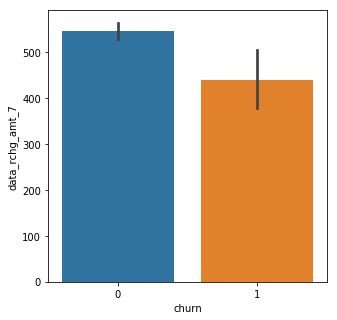

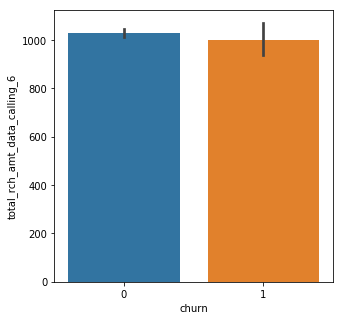

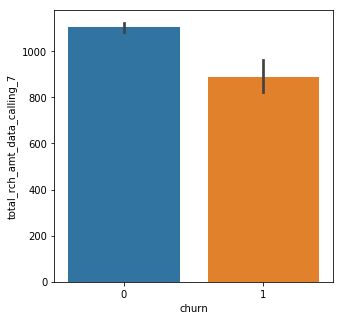

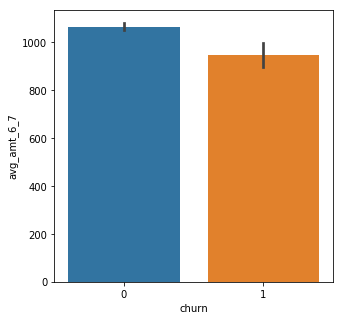

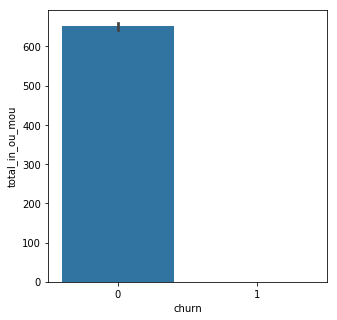

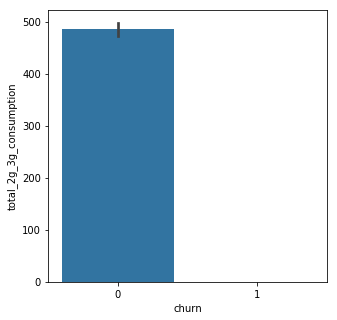

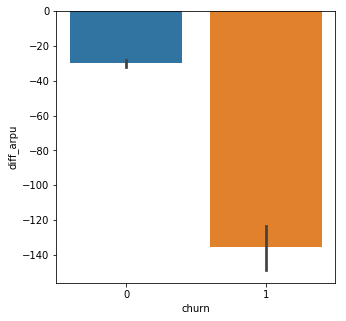

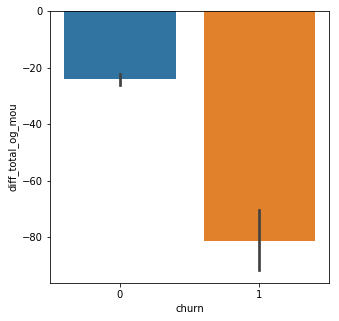

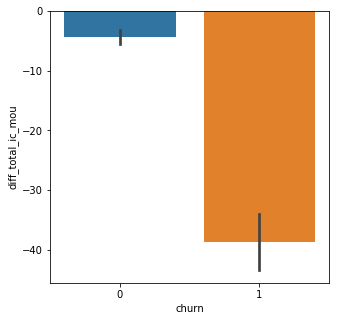

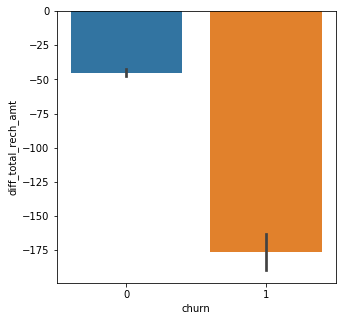

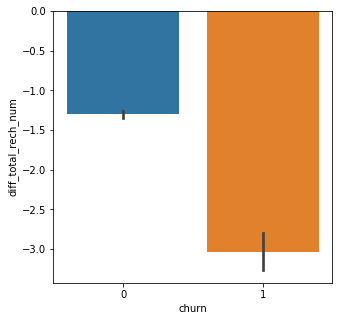

In [90]:
# Bivariate Analysis
for col in num_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=master_df)
    plt.show()

# Model building

In [91]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = master_df.drop(['churn'], axis=1)

#putting response variables in Y
y = master_df['churn']    

# Splitting the data into train and test and use stratify to balance the split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100, stratify=y)

In [92]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
scaler = StandardScaler()

In [93]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# only transforming test data
X_test = scaler.transform(X_test)

In [94]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [95]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [96]:
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       13.29
1       22.13
2       28.63
3       34.01
4       38.19
5       41.50
6       44.29
7       46.71
8       49.08
9       51.42
10      53.58
11      55.56
12      57.43
13      59.28
14      61.08
15      62.80
16      64.41
17      65.96
18      67.48
19      68.86
20      70.16
21      71.37
22      72.54
23      73.64
24      74.71
25      75.74
26      76.63
27      77.48
28      78.31
29      79.10
30      79.86
31      80.61
32      81.30
33      81.98
34      82.63
35      83.28
36      83.90
37      84.51
38      85.11
39      85.68
40      86.24
41      86.79
42      87.31
43      87.82
44      88.30
45      88.76
46      89.20
47      89.63
48      90.03
49      90.42
50      90.80
51      91.15
52      91.49
53      91.81
54      92.11
55      92.40
56      92.67
57      92.94
58      93.21
59      93.46
60      93.70
61      93.93
62      94.15
63      94.37
64      94.59
65      94.80
66      95.00
67      95.21
68      95.41
69      95.61
70      95.80
71    

~ 48 components explain 90% variance

~ 66 components explain 95% variance

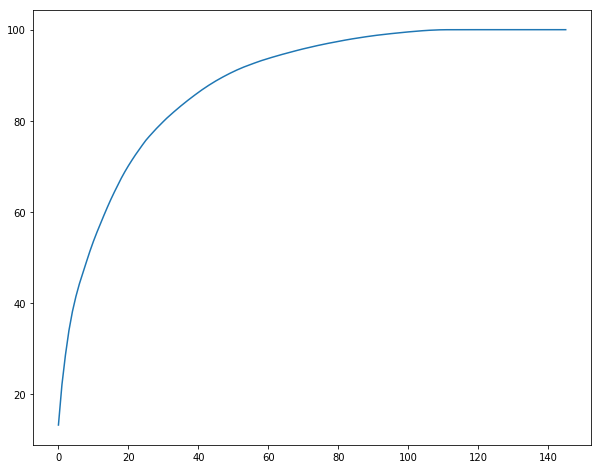

In [97]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(10,8)) 
plt.plot(cumulative_variance)

In [98]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=66)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(13182, 66)

In [99]:
corr_mat = np.corrcoef(df_train_pca.transpose())

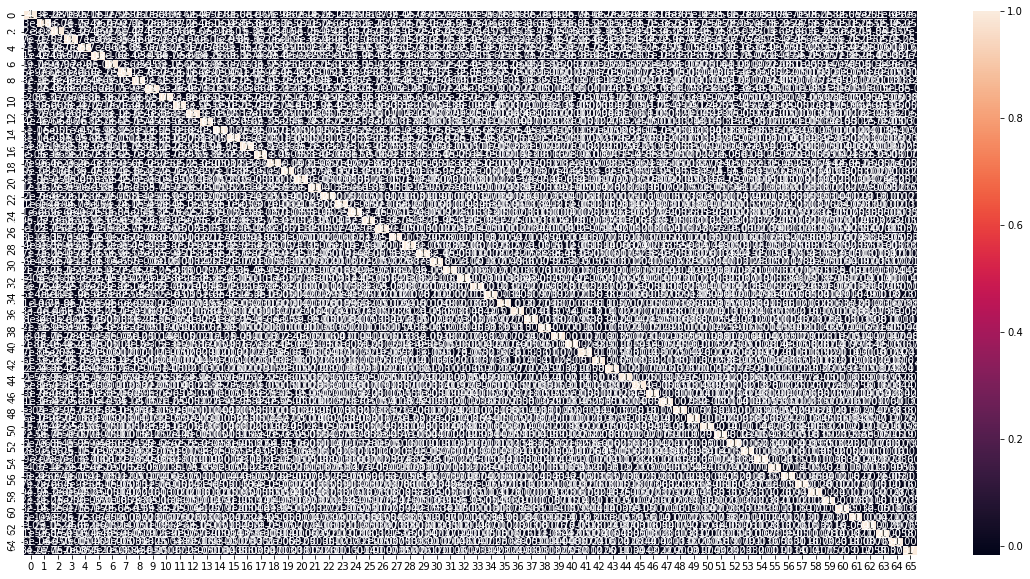

In [100]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corr_mat,annot = True)

In [101]:
mat_minusdiag = corr_mat - np.diagflat(corr_mat.diagonal())
print("max corr:",mat_minusdiag.max(), ", min corr: ", mat_minusdiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.013205337485618914 , min corr:  -0.016723168067524625


In [102]:
#Applying selected components to the test data - 41 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(5650, 66)

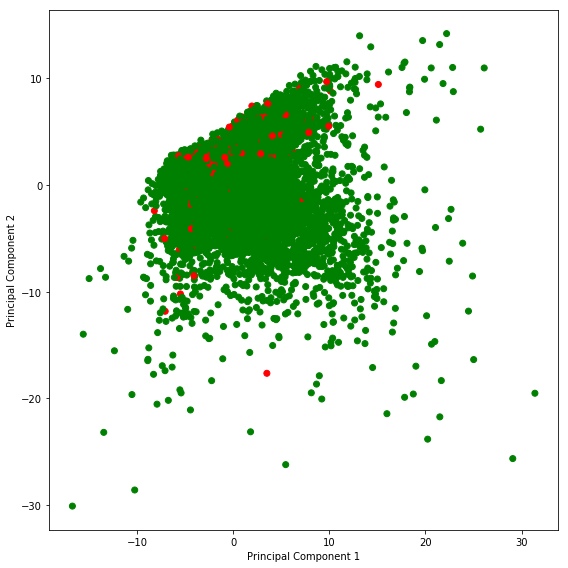

In [103]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### Logistic Regression model using PCA
- Now lets do the modeling with selected 66 pca feature 
- We also needs to do the class imbalance with class_width = balanced

In [136]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

In [137]:

pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.96'

In [138]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [139]:
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[4833  567]
 [  18  232]]
0.8964601769911504


In [140]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})


In [141]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.9641548148148149


## ROC Curve

In [142]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

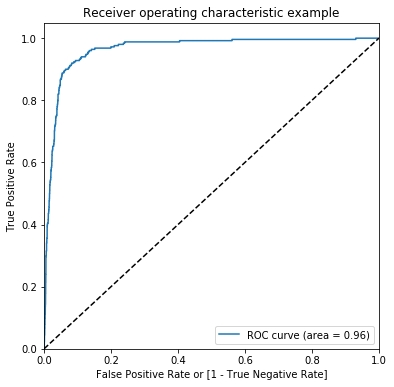

(array([0.00000000e+00, 1.85185185e-04, 1.85185185e-04, ...,
        9.99629630e-01, 9.99814815e-01, 1.00000000e+00]),
 array([0.   , 0.   , 0.004, ..., 1.   , 1.   , 1.   ]),
 array([2.00000000e+00, 1.00000000e+00, 9.99987980e-01, ...,
        6.35059550e-61, 8.32365364e-77, 4.35279581e-88]))

In [143]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [144]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.000306    1    0    0    0    0    0    0    0    0    0
1      0    0.027784    1    0    0    0    0    0    0    0    0    0
2      0    0.000898    1    0    0    0    0    0    0    0    0    0
3      0    0.000473    1    0    0    0    0    0    0    0    0    0
4      1    0.926003    1    1    1    1    1    1    1    1    1    1

- Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [145]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi  speci
0.0   0.0  0.044248  0.000000  1.000
0.1   0.1  0.761770  0.751296  0.988
0.2   0.2  0.818761  0.811852  0.968
0.3   0.3  0.852566  0.847222  0.968
0.4   0.4  0.877876  0.874630  0.948
0.5   0.5  0.896460  0.895000  0.928
0.6   0.6  0.916283  0.916111  0.920
0.7   0.7  0.934159  0.935926  0.896
0.8   0.8  0.950088  0.955741  0.828
0.9   0.9  0.960000  0.975000  0.636


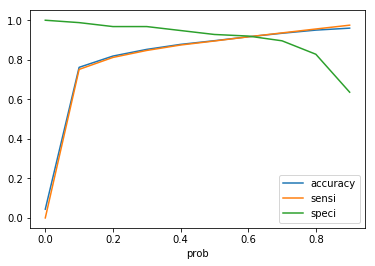

In [146]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [147]:
## Finidng the optimal cutoff
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.6049854921223646]


- Creating new column 'pred_churn' with 1 if Churn_Prob>0.60 else 0

In [148]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.60 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.60 else 0)

y_pred_final.churn.value_counts()

0    5400
1     250
Name: churn, dtype: int64

### Confusion matrix 

In [149]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[4947,  453],
       [  20,  230]], dtype=int64)

### Logistic Regression model using PCA metrics

In [150]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# specificity
print('Specificity: ',TN / float(TN+FP))

# false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value - Precision
print('Precision: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8964601769911504
Sensitivity:  0.92
Specificity:  0.9161111111111111
false postive rate:  0.08388888888888889
Precision:  0.3367496339677892
Negative predictive value:  0.9959734246023757
Misclassification Rate:  0.08371681415929204


## Logistic Regression model with RFE
- We are selecting 10 feature from RFE

In [202]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = master_df.drop(['churn'], axis=1)

#putting response variables in Y
y = master_df['churn']    

# Splitting the data into train and test and use stratify to balance the split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100, stratify=y)

# defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize ( ) to all columns 
X_norm = X_train.apply(normalize) 
X_norm.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
9301   0.086492  0.176830  0.150610     0.000000     0.000389     0.000957   
70427  0.134656  0.132218  0.073993     0.030103     0.011368     0.029590   
6730   0.074781  0.115903  0.084556     0.000333     0.001926     0.000222   
10079  0.544027  0.320868  0.372289     0.050516     0.016703     0.020332   
98151  0.052914  0.100030  0.031168     0.000000     0.000580     0.001459   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
9301       0.123415      0.285499      0.215751       0.000000            0.0   
70427      0.097526      0.067475      0.057087       0.000000            0.0   
6730       0.000593      0.011046      0.000517       0.000000            0.0   
10079      0.232816      0.188767      0.140268       0.083168            0.0   
98151      0.001458      0.001707      0.005222       0.000000            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
9301        0.000000       0.000000            0.0       0.000000   
70427       0.000000       0.000000            0.0       0.000000   
6730        0.000000       0.000000            0.0       0.000000   
10079       0.029061       0.215651            0.0       0.042682   
98151       0.000000       0.000000            0.0       0.000000   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
9301           0.000000          0.000390          0.000960          0.218868   
70427          0.030223          0.011398          0.029677          0.174483   
6730           0.000334          0.001931          0.000222          0.001079   
10079          0.033939          0.011759          0.011497          0.115568   
98151          0.000000          0.000582          0.001463          0.000387   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
9301           0.397787          0.344796          0.003469          0.000000   
70427          0.096996          0.107112          0.002146          0.006910   
6730           0.006479          0.000000          0.000000          0.000000   
10079          0.150347          0.113286          0.263507          0.093236   
98151          0.002478          0.001250          0.000000          0.000000   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
9301           0.000032          0.015117          0.000000          0.001483   
70427          0.003457          0.000000          0.000000          0.000000   
6730           0.000000          0.000000          0.030205          0.000000   
10079          0.058224          0.000000          0.000000          0.000000   
98151          0.000000          0.022378          0.000000          0.000000   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
9301       0.144252      0.241559      0.220776          0.000000   
70427      0.140158      0.071108      0.097235          0.000000   
6730       0.000988      0.005760      0.000211          0.000000   
10079      0.130140      0.122263      0.096694          0.013282   
98151      0.000254      0.002054      0.002184          0.000000   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
9301           0.000000          0.000000          0.000000          0.000000   
70427          0.000000          0.000000          0.000000          0.000000   
6730           0.000000          0.000000          0.000000          0.000000   
10079          0.005873          0.007168          0.067878          0.056888   
98151          0.000000          0.000000          0.000000          0.000000   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
9301           0.000000          0.000000          0.217866          0.488138   
70427          0.000000          0.020887          0.016553          0.000678   
6730           0.000000         

In [203]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
from sklearn.feature_selection import RFE
rfe = RFE(lr, 20)            
rfe = rfe.fit(X_norm,y_train)
print(rfe.support_)           
print(rfe.ranking_)          

[False False False False False  True False  True False False False  True
 False  True False False False False False False False False False False
  True False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False  True  True  True False False  True
 False False False False False False False False  True False False False
 False False False False False  True False False  True False False False
 False False False False False False False False False False False  True
 False False  True False False False False False False False False False
 False  True False False False False False  True  True False False  True
 False False]
[ 38  17 102   8  22   1  54   1   5  21  26   1  75   1  12 122  89  65
  10  97  70 109  62 127   1  87  46 

In [204]:
col = X_train.columns[rfe.support_]
col

Index(['onnet_mou_8', 'offnet_mou_7', 'roam_ic_mou_8', 'roam_og_mou_7',
       'loc_og_t2c_mou_6', 'std_og_mou_6', 'loc_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'monthly_2g_8',
       'sachet_2g_8', 'sep_vbc_3g', 'total_in_ou_mou',
       'total_2g_3g_consumption', 'diff_total_ic_mou'],
      dtype='object')

In [205]:
import statsmodels.api as sm
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

### Correlation matrix

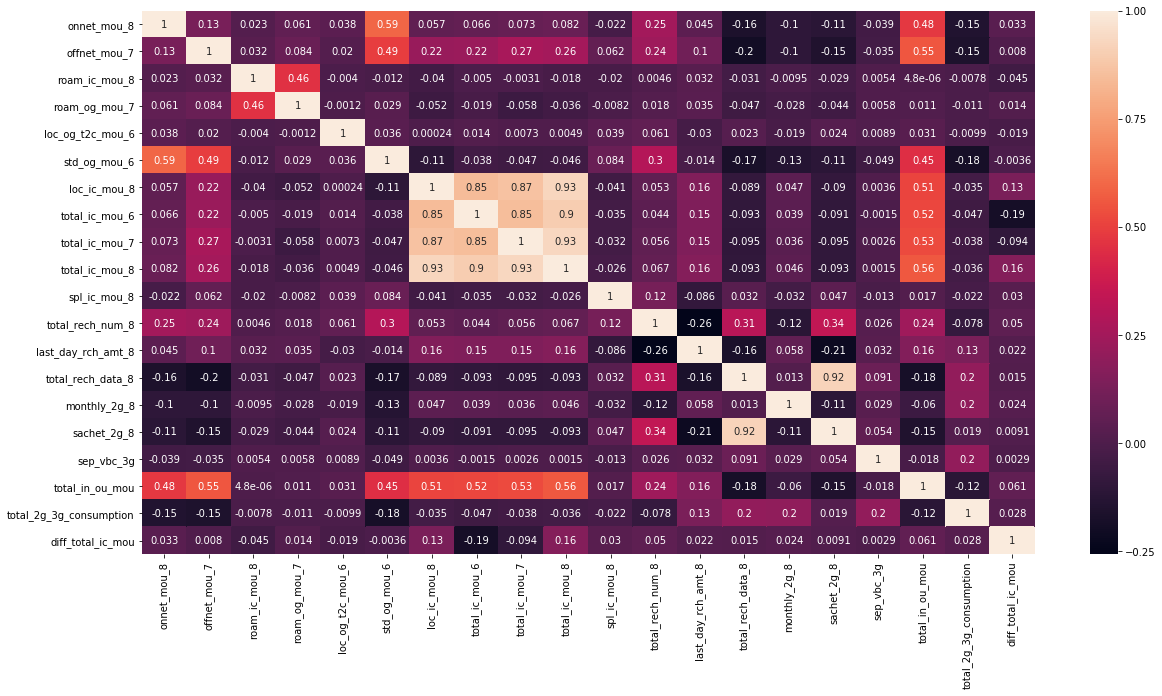

In [206]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_norm[col].corr(),annot = True)

### VIF value

In [207]:
col_for_vif = list(col)
col_for_vif.append('churn')
vif_cal(input_data=master_df[col_for_vif], dependent_col='churn')

Var        Vif
19        diff_total_ic_mou        inf
7            total_ic_mou_6        inf
8            total_ic_mou_7        inf
9            total_ic_mou_8        inf
6              loc_ic_mou_8  14.350000
13        total_rech_data_8  13.110000
15              sachet_2g_8  10.900000
17          total_in_ou_mou   6.010000
1              offnet_mou_7   3.540000
5              std_og_mou_6   3.350000
11         total_rech_num_8   3.240000
0               onnet_mou_8   2.930000
18  total_2g_3g_consumption   1.740000
12       last_day_rch_amt_8   1.700000
14             monthly_2g_8   1.290000
3             roam_og_mou_7   1.280000
2             roam_ic_mou_8   1.240000
10             spl_ic_mou_8   1.090000
16               sep_vbc_3g   1.080000
4          loc_og_t2c_mou_6   1.060000

In [208]:
col=col.drop('diff_total_ic_mou')

In [209]:
col_for_vif = list(col)
col_for_vif.append('churn')
vif_cal(input_data=master_df[col_for_vif], dependent_col='churn')

Var    Vif
9            total_ic_mou_8  32.60
6              loc_ic_mou_8  14.35
8            total_ic_mou_7  14.18
13        total_rech_data_8  13.11
15              sachet_2g_8  10.90
7            total_ic_mou_6   9.63
17          total_in_ou_mou   6.01
1              offnet_mou_7   3.54
5              std_og_mou_6   3.35
11         total_rech_num_8   3.24
0               onnet_mou_8   2.93
18  total_2g_3g_consumption   1.74
12       last_day_rch_amt_8   1.70
14             monthly_2g_8   1.29
3             roam_og_mou_7   1.28
2             roam_ic_mou_8   1.24
10             spl_ic_mou_8   1.09
16               sep_vbc_3g   1.08
4          loc_og_t2c_mou_6   1.06

In [215]:
col=col.drop('total_ic_mou_8','total_rech_data_8', 'total_ic_mou_7')

In [216]:
col_for_vif = list(col)
col_for_vif.append('churn')
vif_cal(input_data=master_df[col_for_vif], dependent_col='churn')

Var   Vif
6              loc_ic_mou_8  7.10
7            total_ic_mou_6  6.88
14          total_in_ou_mou  5.86
1              offnet_mou_7  3.48
5              std_og_mou_6  3.33
9          total_rech_num_8  3.13
0               onnet_mou_8  2.91
10       last_day_rch_amt_8  1.68
12              sachet_2g_8  1.53
15  total_2g_3g_consumption  1.41
3             roam_og_mou_7  1.27
2             roam_ic_mou_8  1.23
11             monthly_2g_8  1.21
8              spl_ic_mou_8  1.09
13               sep_vbc_3g  1.08
4          loc_og_t2c_mou_6  1.06

- VIF looks good now will select these coloum for creating LogisticRegression

In [217]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### ROC_AUC score

In [218]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'1.0'

In [219]:
#Making prediction on the test data
pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])

In [220]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5400
          1       0.92      1.00      0.96       250

avg / total       1.00      1.00      1.00      5650

[[5378   22]
 [   0  250]]
accuracy_score :  0.9961061946902655


In [221]:

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})


In [222]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.999214074074074


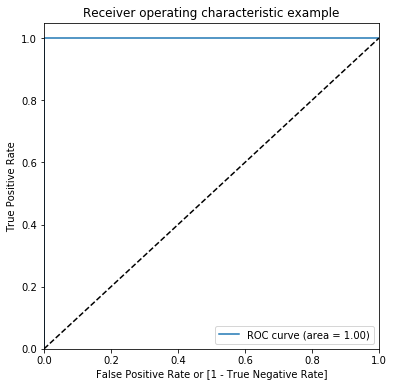

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.85185185e-04, 1.85185185e-04,
        1.85185185e-04, 1.85185185e-04, 1.85185185e-04, 1.85185185e-04,
        1.85185185e-04, 1.85185185e-04, 1.85185185e-04, 1.85185185e-04,
        1.85185185e-04, 1.85185185e-04, 1.85185185e-04, 1.85185185e-04,
        1.85185185e-04, 1.85185185e-04, 1.85185185e-04, 1.85185185e-04,
        1.85185185e-04, 1.85185185e-04, 1.85185185e-04, 1.85185185e-04,
        1.85185185e-04, 1.85185185e-04, 1.85185185e-04, 1.85185185e-04,
        1.85185185e-04, 1.85185185e-04, 1.85185185e-04, 1.85185185e-04,
        1.85185185e-04, 1.85185185e-04, 1.85185185e-04, 1.85185185e-04,
        1.85185185e-04, 1.85185185e-04, 1.85185185e-04, 1.85185185e-04,
        1.85185185e-04, 1.85185185e-04, 1.85185185e-04, 1.85185185e-04,
        1.85185185e-04, 1.85185185e-04, 1.85185185e-04, 1.851851

In [194]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [223]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()


churn    churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0  0.000000e+00    0    0    0    0    0    0    0    0    0    0
1      0  1.511567e-98    1    0    0    0    0    0    0    0    0    0
2      0  0.000000e+00    0    0    0    0    0    0    0    0    0    0
3      0  0.000000e+00    0    0    0    0    0    0    0    0    0    0
4      1  9.929481e-01    1    1    1    1    1    1    1    1    1    1

In [224]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi  speci
0.0   0.0  0.756106  0.744815  1.000
0.1   0.1  0.995575  0.995370  1.000
0.2   0.2  0.995752  0.995556  1.000
0.3   0.3  0.995929  0.995741  1.000
0.4   0.4  0.995929  0.995741  1.000
0.5   0.5  0.996106  0.995926  1.000
0.6   0.6  0.996460  0.996296  1.000
0.7   0.7  0.996637  0.996481  1.000
0.8   0.8  0.997168  0.997222  0.996
0.9   0.9  0.997168  0.997963  0.980


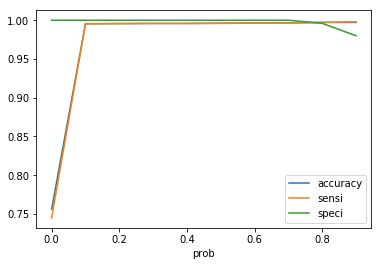

In [225]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [226]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.7976610231716287]


In [227]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.66 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.66 else 0)

y_pred_final.churn.value_counts()


0    5400
1     250
Name: churn, dtype: int64

In [228]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[5381,   19],
       [   0,  250]], dtype=int64)

In [229]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.9961061946902655
Sensitivity:  1.0
Specificity:  0.9964814814814815
false postive rate:  0.0035185185185185185
positive predictive value:  0.929368029739777
Negative predictive value:  1.0


#### As we can see Above LogisticRegression giving good Accuracy with PCA and  RFE


#### With PCA
- Accuracy Score on test data:  0.875575221238938
-  Sensitivity:  0.9109311740890689
-  Specificity:  0.909309642791042
-  false postive rate:  0.09069035720895799
-  positive predictive value:  0.3146853146853147
-  Negative predictive value:  0.9955420466058764-
-  Misclassification Rate:  0.09061946902654867

#### With RFE
- Accuracy Score :  0.868495575221239
- Sensitivity:  0.9392712550607287
- Specificity:  0.9381824912085879
- false postive rate:  0.06181750879141218
- positive predictive value:  0.4098939929328622
- Negative predictive value:  0.9970495672698663


## RandomForestClassifier with PCA

In [230]:
# Random forest

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [232]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[5391,    9],
       [ 242,    8]], dtype=int64)

In [233]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.032
Specificity:  0.9983333333333333
false postive rate:  0.0016666666666666668
positive predictive value:  0.47058823529411764
Negative predictive value:  0.9570388780401207
Misclassification Rate:  0.04442477876106195


### Hyperparameter tuning for RandomForest

In [234]:
#Lets do some hyper parameter tuning 
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [235]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.362789         0.007195         0.792217          0.796484   
1       1.216701         0.015393         0.917539          0.937112   
2       1.478383         0.013194         0.949097          0.983955   
3       1.268538         0.008195         0.954939          0.990423   

  param_max_depth             params  rank_test_score  split0_test_score  \
0               2   {'max_depth': 2}                4           0.765264   
1               7   {'max_depth': 7}                3           0.911263   
2              12  {'max_depth': 12}                2           0.946530   
3              17  {'max_depth': 17}                1           0.952598   

   split0_train_score  split1_test_score  split1_train_score  \
0            0.777525           0.804702            0.802371   
1            0.931721           0.932878            0.946989   
2            0.984448           0.954115            0.987387   
3            0.990138           0.957527            0.991275   

   split2_test_score  split2_train_score  split3_test_score  \
0           0.839970            0.845993           0.746586   
1           0.924535            0.946420           0.911229   
2           0.949185            0.979706           0.948407   
3           0.954873            0.989853           0.955235   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0            0.743410           0.804554            0.813122      0.049798   
1            0.926512           0.907780            0.933915      0.083163   
2            0.982458           0.947249            0.985778      0.093060   
3            0.990707           0.954459            0.990139      0.185746   

   std_score_time  std_test_score  std_train_score  
0        0.000980        0.032856         0.034464  
1        0.014311        0.009578         0.008196  
2        0.005111        0.002671         0.002670  
3        0.001718        0.001582         0.000509

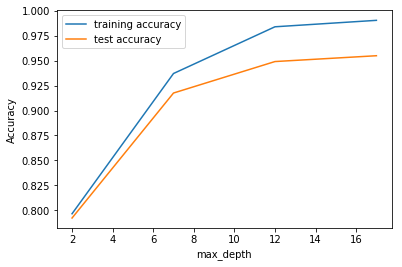

In [236]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 10 to 12

In [238]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [239]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       8.994763         0.060766         0.950614          0.983367   
1      50.534900         0.377386         0.951601          0.984335   
2      83.462941         0.548886         0.951980          0.984145   
3     107.812346         0.700401         0.952435          0.984695   

  param_n_estimators                  params  rank_test_score  \
0                100   {'n_estimators': 100}                4   
1                500   {'n_estimators': 500}                3   
2                900   {'n_estimators': 900}                2   
3               1300  {'n_estimators': 1300}                1   

   split0_test_score  split0_train_score  split1_test_score  \
0           0.951460            0.982741           0.954115   
1           0.951460            0.983499           0.955631   
2           0.952598            0.982266           0.957527   
3           0.952977            0.982930           0.956011   

   split1_train_score  split2_test_score  split2_train_score  \
0            0.985206           0.948805            0.981982   
1            0.985680           0.948426            0.983784   
2            0.985775           0.948426            0.982930   
3            0.986724           0.949564            0.983499   

   split3_test_score  split3_train_score  split4_test_score  \
0           0.948027            0.982268           0.950664   
1           0.949924            0.983501           0.952562   
2           0.949924            0.984639           0.951423   
3           0.951821            0.984828           0.951803   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.984640      0.575508        0.001600        0.002142   
1            0.985209      1.846931        0.045002        0.002453   
2            0.985114      0.493126        0.036897        0.003109   
3            0.985494     14.521211        0.138917        0.002103   

   std_train_score  
0         0.001306  
1         0.000924  
2         0.001330  
3         0.001365

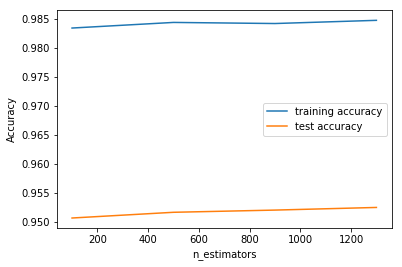

In [241]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [242]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [243]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.440942         0.008197         0.944925          0.974871   
1       0.923391         0.008595         0.942421          0.973676   
2       1.499340         0.008397         0.939084          0.970035   
3       2.285490         0.007796         0.942194          0.971856   
4       2.610305         0.007996         0.944394          0.974112   

  param_max_features                params  rank_test_score  \
0                  4   {'max_features': 4}                1   
1                  8   {'max_features': 8}                3   
2                 14  {'max_features': 14}                5   
3                 20  {'max_features': 20}                4   
4                 24  {'max_features': 24}                2   

   split0_test_score  split0_train_score  split1_test_score  \
0           0.943496            0.970413           0.950322   
1           0.941221            0.974490           0.948047   
2           0.931741            0.963679           0.945392   
3           0.940083            0.969369           0.948426   
4           0.946151            0.975913           0.946151   

   split1_train_score  split2_test_score  split2_train_score  \
0            0.980749           0.941600            0.974111   
1            0.976197           0.937808            0.969938   
2            0.974111           0.935154            0.971930   
3            0.971266           0.934774            0.971835   
4            0.974870           0.940083            0.971361   

   split3_test_score  split3_train_score  split4_test_score  \
0           0.942337            0.973734           0.946869   
1           0.945372            0.976579           0.939658   
2           0.938923            0.969752           0.944213   
3           0.948786            0.978570           0.938899   
4           0.944992            0.975346           0.944592   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.975348      0.070327        0.001471        0.003247   
1            0.971177      0.026220        0.001199        0.003761   
2            0.970703      0.055212        0.000800        0.005206   
3            0.968237      0.067411        0.000399        0.005526   
4            0.973073      0.044938        0.001264        0.002243   

   std_train_score  
0         0.003362  
1         0.002671  
2         0.003496  
3         0.003597  
4         0.001673

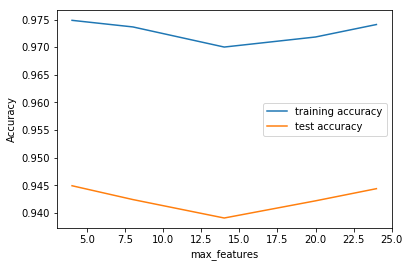

In [244]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 8 to 10

In [245]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [246]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.710187         0.008195         0.888181          0.900489   
1       0.806737         0.014791         0.868381          0.881467   
2       0.817335         0.009996         0.866560          0.873198   
3       0.736376         0.010195         0.846230          0.859259   
4       0.646510         0.007395         0.840616          0.851673   

  param_min_samples_leaf                     params  rank_test_score  \
0                    100  {'min_samples_leaf': 100}                1   
1                    150  {'min_samples_leaf': 150}                2   
2                    200  {'min_samples_leaf': 200}                3   
3                    250  {'min_samples_leaf': 250}                4   
4                    300  {'min_samples_leaf': 300}                5   

   split0_test_score  split0_train_score  split1_test_score  \
0           0.886614            0.898909           0.893060   
1           0.867653            0.885917           0.849829   
2           0.852105            0.862779           0.872203   
3           0.852484            0.863442           0.855897   
4           0.846416            0.859175           0.818733   

   split1_train_score  split2_test_score  split2_train_score  \
0            0.895875           0.884717            0.904315   
1            0.852442           0.879029            0.904220   
2            0.879469           0.872962            0.876719   
3            0.866856           0.840728            0.856615   
4            0.838217           0.839590            0.858606   

   split3_test_score  split3_train_score  split4_test_score  \
0           0.895296            0.905936           0.881214   
1           0.881259            0.890575           0.864137   
2           0.871396            0.871800           0.864137   
3           0.843323            0.852646           0.838710   
4           0.849014            0.848663           0.849336   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.897412      0.134028        0.001468        0.005242   
1            0.874182      0.018536        0.005771        0.011332   
2            0.875225      0.022810        0.001410        0.007888   
3            0.856737      0.038169        0.003707        0.006750   
4            0.853702      0.055596        0.000800        0.011491   

   std_train_score  
0         0.003939  
1         0.017413  
2         0.005768  
3         0.005144  
4         0.007728

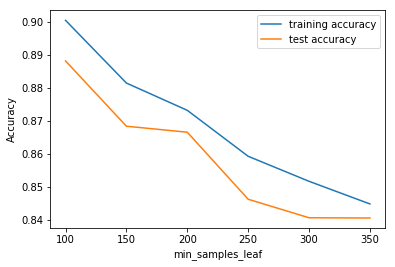

In [247]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 100 to 150

In [248]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [249]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.660420         0.006998         0.912456          0.932768   
1       0.509306         0.007004         0.899712          0.915055   
2       0.483122         0.005402         0.895843          0.912874   
3       0.453942         0.004601         0.888181          0.903183   
4       0.456454         0.005402         0.877257          0.894307   

  param_min_samples_split                      params  rank_test_score  \
0                     200  {'min_samples_split': 200}                1   
1                     250  {'min_samples_split': 250}                2   
2                     300  {'min_samples_split': 300}                3   
3                     350  {'min_samples_split': 350}                4   
4                     400  {'min_samples_split': 400}                6   

   split0_test_score  split0_train_score  split1_test_score  \
0           0.912400            0.936083           0.919606   
1           0.898749            0.917307           0.902162   
2           0.890027            0.906686           0.896852   
3           0.890785            0.903651           0.896852   
4           0.876754            0.900522           0.878650   

   split1_train_score  split2_test_score  split2_train_score  \
0            0.935609           0.909746            0.932290   
1            0.915505           0.896094            0.921195   
2            0.914746           0.901024            0.913893   
3            0.908867           0.879029            0.902229   
4            0.892271           0.872962            0.894832   

   split3_test_score  split3_train_score  split4_test_score  \
0           0.913126            0.930969           0.907400   
1           0.912747            0.915703           0.888805   
2           0.894917            0.915513           0.896395   
3           0.896813            0.906315           0.877419   
4           0.892261            0.899772           0.865655   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.928890      0.064574        0.000893        0.004110   
1            0.905566      0.028459        0.002613        0.007859   
2            0.913530      0.016920        0.000487        0.003546   
3            0.894852      0.006364        0.000485        0.008438   
4            0.884138      0.026382        0.001352        0.008721   

   std_train_score  
0         0.002741  
1         0.005166  
2         0.003170  
3         0.004747  
4         0.005938

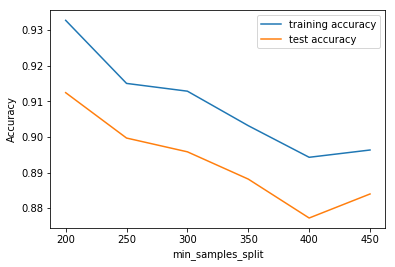

In [250]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 200 to 300

In [251]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [252]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 12.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [8, 10], 'min_samples_leaf': range(100, 200, 100), 'min_samples_split': range(200, 400, 100), 'n_estimators': range(200, 400, 100), 'max_features': [8, 10, 12]},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn', scoring=None, verbose=1)

In [253]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9106357153694432 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [254]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)

In [255]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=8,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [256]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [257]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

             precision    recall  f1-score   support

          0       0.99      0.92      0.95      5400
          1       0.29      0.72      0.41       250

avg / total       0.96      0.91      0.93      5650

[[4961  439]
 [  70  180]]
accuracy_score:   0.9099115044247787


In [258]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[4961,  439],
       [  70,  180]], dtype=int64)

In [259]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.9099115044247787
Sensitivity:  0.72
Specificity:  0.9187037037037037
false postive rate:  0.0812962962962963
positive predictive value:  0.29079159935379645
Negative predictive value:  0.9860862651560326
Misclassification Rate:  0.09008849557522124


### Recomendation for Model Selection
- Logistic Regression and Random Forest performed well enough for customer churn analysis for this particular dataset, using PCA.
- LogisticRegression is the best model 80.9% Sensitivity
- Accuracy of RandomForest is highest with 85%

#### LogisticRegression 
- Accuracy Score : 0.8110962864131643 (With PCA on Test)
- Sensitivity: 0.8098159509202454 (with PCA)

- Accuracy Score : 0.811985768289971 (With RFE on Test)
- Sensitivity: 0.8122699386503067 (with RFE)

#### RandomForest
- Accuracy Score:   0.8570157883033134
- Sensitivity:  0.6711656441717792


## RandomForest on all feature

In [260]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [261]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [262]:
# Making predictions
predictions = rfc.predict(X_test)

In [263]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      5400
          1       0.98      0.76      0.86       250

avg / total       0.99      0.99      0.99      5650

[[5396    4]
 [  60  190]]
0.9886725663716814


In [264]:
# Confusion Matrix
confusion_rf_with_all_feature=confusion_matrix(y_test,predictions)
confusion_rf_with_all_feature

array([[5396,    4],
       [  60,  190]], dtype=int64)

In [265]:
TN = confusion_rf_with_all_feature[0,0] # true positive 
TP = confusion_rf_with_all_feature[1,1] # true negatives
FP = confusion_rf_with_all_feature[0,1] # false positives
FN = confusion_rf_with_all_feature[1,0] # false negatives

print('Accuracy Score: ', accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.9886725663716814
Sensitivity:  0.76
Specificity:  0.9992592592592593
false postive rate:  0.0007407407407407407
positive predictive value:  0.979381443298969
Negative predictive value:  0.9890029325513197
Misclassification Rate:  0.011327433628318584


## Hyperparameter Tuning 

In [266]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)


In [267]:
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [268]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.223754         0.006723         0.951373          0.951296   
1       0.546838         0.015623         0.984069          0.989702   
2       0.606208         0.012499         0.990745          0.999260   
3       0.582094         0.016497         0.988773          0.999583   

  param_max_depth             params  rank_test_score  split0_test_score  \
0               2   {'max_depth': 2}                4           0.926811   
1               7   {'max_depth': 7}                3           0.982556   
2              12  {'max_depth': 12}                1           0.989761   
3              17  {'max_depth': 17}                2           0.986348   

   split0_train_score  split1_test_score  split1_train_score  \
0            0.922333           0.963595            0.963490   
1            0.986724           0.981039            0.987293   
2            0.998957           0.995449            0.999905   
3            0.999810           0.995829            0.999526   

   split2_test_score  split2_train_score  split3_test_score  \
0           0.918468            0.918729           0.979514   
1           0.990899            0.997155           0.989757   
2           0.991657            0.998578           0.987481   
3           0.991278            0.999905           0.983308   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0            0.983785           0.968501            0.968143      0.032452   
1            0.994121           0.976091            0.983218      0.045282   
2            0.999621           0.989374            0.999241      0.070151   
3            0.998957           0.987097            0.999716      0.053421   

   std_score_time  std_test_score  std_train_score  
0        0.006032        0.024170         0.026029  
1        0.000002        0.005551         0.005134  
2        0.006250        0.002701         0.000470  
3        0.007819        0.004350         0.000337

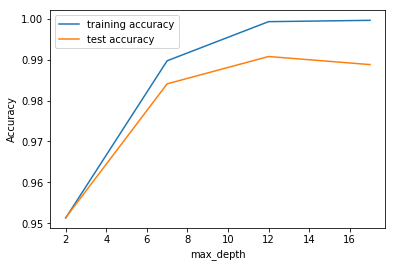

In [269]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#10,12

In [270]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': range(100, 1000, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [271]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       5.610898         0.061777         0.995524          0.999867   
1      25.838649         0.278899         0.996435          0.999962   
2      44.742393         0.476058         0.996131          1.000000   

  param_n_estimators                 params  rank_test_score  \
0                100  {'n_estimators': 100}                3   
1                500  {'n_estimators': 500}                1   
2                900  {'n_estimators': 900}                2   

   split0_test_score  split0_train_score  split1_test_score  \
0           0.995829                 1.0           0.996587   
1           0.995070                 1.0           0.998104   
2           0.994691                 1.0           0.996966   

   split1_train_score  split2_test_score  split2_train_score  \
0            0.999905           0.994691            1.000000   
1            0.999905           0.995449            0.999905   
2            1.000000           0.995070            1.000000   

   split3_test_score  split3_train_score  split4_test_score  \
0           0.995068                 1.0           0.995446   
1           0.995068                 1.0           0.998482   
2           0.995827                 1.0           0.998102   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.999431      0.364878        0.001695        0.000653   
1            1.000000      0.574427        0.027064        0.001528   
2            1.000000      6.509424        0.151260        0.001255   

   std_train_score  
0         0.000221  
1         0.000046  
2         0.000000

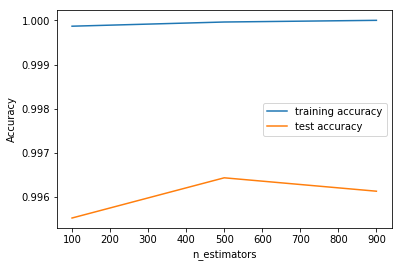

In [272]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [273]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [274]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.178566         0.012977         0.968518          0.986857   
1       0.248210         0.006959         0.979821          0.994936   
2       0.344237         0.007538         0.992338          0.999564   
3       0.426412         0.008324         0.995752          0.999962   
4       0.428426         0.004721         0.999241          0.999981   

  param_max_features                params  rank_test_score  \
0                  4   {'max_features': 4}                5   
1                  8   {'max_features': 8}                4   
2                 14  {'max_features': 14}                3   
3                 20  {'max_features': 20}                2   
4                 24  {'max_features': 24}                1   

   split0_test_score  split0_train_score  split1_test_score  \
0           0.959424            0.980654           0.967387   
1           0.985590            0.997724           0.976109   
2           0.993174            1.000000           0.994691   
3           0.993932            0.999905           0.998862   
4           0.999242            1.000000           0.998862   

   split1_train_score  split2_test_score  split2_train_score  \
0            0.981508           0.971179            0.988810   
1            0.989948           0.977247            0.996491   
2            0.999716           0.990520            0.999716   
3            0.999905           0.995070            1.000000   
4            1.000000           0.998862            0.999905   

   split3_test_score  split3_train_score  split4_test_score  \
0           0.967375            0.989759           0.977230   
1           0.973824            0.992509           0.986338   
2           0.987860            0.998483           0.995446   
3           0.992413            1.000000           0.998482   
4           1.000000            1.000000           0.999241   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.993553      0.023715        0.003251        0.005801   
1            0.998009      0.017952        0.005510        0.005140   
2            0.999905      0.029113        0.004995        0.002802   
3            1.000000      0.041537        0.005014        0.002532   
4            1.000000      0.059255        0.006267        0.000415   

   std_train_score  
0         0.004983  
1         0.003175  
2         0.000552  
3         0.000046  
4         0.000038

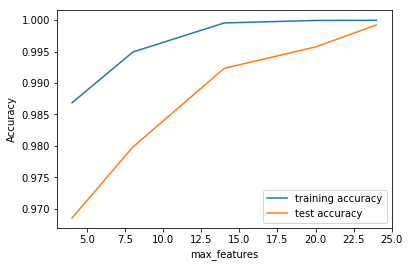

In [275]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [276]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [277]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.293262         0.004924         0.953801          0.957822   
1       0.252392         0.006197         0.957214          0.958959   
2       0.246750         0.004724         0.958580          0.960268   
3       0.237396         0.007649         0.936959          0.939557   
4       0.238097         0.007792         0.903960          0.906636   

  param_min_samples_leaf                     params  rank_test_score  \
0                    100  {'min_samples_leaf': 100}                3   
1                    150  {'min_samples_leaf': 150}                2   
2                    200  {'min_samples_leaf': 200}                1   
3                    250  {'min_samples_leaf': 250}                4   
4                    300  {'min_samples_leaf': 300}                6   

   split0_test_score  split0_train_score  split1_test_score  \
0           0.965112            0.964817           0.952218   
1           0.956011            0.950593           0.932878   
2           0.943496            0.940920           0.976868   
3           0.909746            0.909720           0.913159   
4           0.913538            0.911332           0.938946   

   split1_train_score  split2_test_score  split2_train_score  \
0            0.958369           0.966629            0.967852   
1            0.937696           0.963595            0.966335   
2            0.978284           0.966250            0.966524   
3            0.920626           0.960182            0.959886   
4            0.944998           0.922260            0.932575   

   split3_test_score  split3_train_score  split4_test_score  \
0           0.940440            0.951830           0.944592   
1           0.964719            0.970415           0.968880   
2           0.945751            0.954295           0.960531   
3           0.938543            0.945098           0.963188   
4           0.890744            0.892092           0.854269   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.946241      0.022807        0.006384        0.010567   
1            0.969754      0.017820        0.003123        0.012860   
2            0.961316      0.017320        0.006264        0.012564   
3            0.962454      0.017238        0.006995        0.022525   
4            0.852185      0.016313        0.000399        0.029304   

   std_train_score  
0         0.007998  
1         0.012840  
2         0.012448  
3         0.021056  
4         0.032689

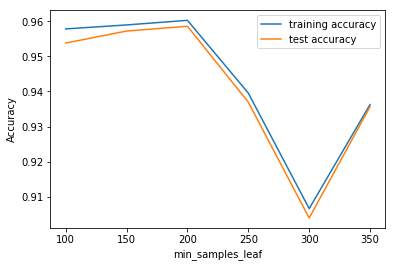

In [278]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [279]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 700, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(100, 700, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [280]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.310456         0.007922         0.989683          0.992642   
1       0.363919         0.001798         0.977469          0.978607   
2       0.341913         0.009197         0.975724          0.976976   
3       0.374476         0.014152         0.978911          0.980124   
4       0.328042         0.012440         0.967000          0.969409   

  param_min_samples_split                      params  rank_test_score  \
0                     100  {'min_samples_split': 100}                1   
1                     150  {'min_samples_split': 150}                3   
2                     200  {'min_samples_split': 200}                4   
3                     250  {'min_samples_split': 250}                2   
4                     300  {'min_samples_split': 300}                6   

   split0_test_score  split0_train_score  split1_test_score  \
0           0.985210            0.987198           0.989003   
1           0.978385            0.979232           0.983314   
2           0.978005            0.978189           0.979901   
3           0.982177            0.982361           0.980660   
4           0.952977            0.958843           0.972696   

   split1_train_score  split2_test_score  split2_train_score  \
0            0.993457           0.993553            0.996207   
1            0.983120           0.982935            0.981982   
2            0.979042           0.973455            0.971171   
3            0.984353           0.974213            0.972025   
4            0.972688           0.978764            0.977051   

   split3_test_score  split3_train_score  split4_test_score  \
0           0.997344            0.999526           0.983302   
1           0.970030            0.970605           0.972676   
2           0.979894            0.984923           0.967362   
3           0.974962            0.978570           0.982543   
4           0.971168            0.977432           0.959393   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.986821      0.015400        0.004942        0.005193   
1            0.978098      0.041195        0.003597        0.005351   
2            0.971556      0.043564        0.001937        0.004797   
3            0.983313      0.026339        0.000694        0.003594   
4            0.961032      0.031496        0.002910        0.009410   

   std_train_score  
0         0.004986  
1         0.004392  
2         0.005138  
3         0.004496  
4         0.007942

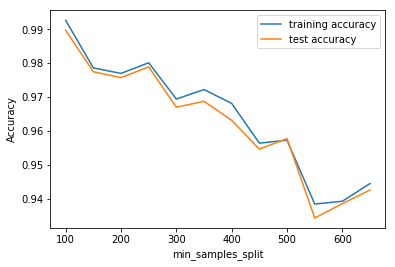

In [281]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [282]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,400,500], 
    'max_features': [15, 20]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, verbose = 1, n_jobs=-1)

In [283]:
# fit
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 10.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 12], 'min_samples_leaf': range(150, 250, 50), 'min_samples_split': range(200, 400, 100), 'n_estimators': [300, 400, 500], 'max_features': [15, 20]},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn', scoring=None, verbose=1)

- printing the optimal accuracy score and hyperparameters

In [284]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9744348353815809 using {'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 300}


In [285]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=150, 
                             min_samples_split=300,
                             max_features=15,
                             n_estimators=500)

In [286]:
# fit
rfc_final.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=15,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=150,
            min_samples_split=300, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [287]:
# predict
predictions = rfc_final.predict(X_test)

In [288]:
from sklearn import metrics
confusion_rm_f = metrics.confusion_matrix( y_test, predictions )
confusion_rm_f

array([[5256,  144],
       [   1,  249]], dtype=int64)

In [289]:
TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives

print('Accuracy Score: ',accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.9743362831858408
Sensitivity:  0.996
Specificity:  0.9733333333333334
false postive rate:  0.02666666666666667
positive predictive value:  0.6335877862595419
Negative predictive value:  0.9998097774396043
Misclassification Rate:  0.02566371681415929


### RandomForest model with All feature gives: 
- **87%** of Accuracy and **82.9%** of Sensitivity

In [290]:
#Important Variables
from collections import OrderedDict
feature_names=list(X_train.columns.values)
important_features_dict = {}
for name, importance in zip(feature_names, rfc_final.feature_importances_):
    important_features_dict[name]=importance
#Sorting Dictionary in descending order of the importance variable
d_descending = OrderedDict(sorted(important_features_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [291]:
master_df.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'total_rch_amt_data_calling_7', 'avg_amt_6_7', 'total_in_ou_mou',
       'total_2g_3g_consumption', 'churn', 'diff_arpu', 'diff_total_og_mou',
       'diff_total_ic_mou', 'diff_total_rech_amt', 'diff_total_rech_num'],
      dtype='object', length=147)

In [292]:
#Variable Importance top 30 variable
dic= dict(d_descending)

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=12
n_items = take(n, dic.items())

In [293]:
print('These are top 12 driver variable: ',n_items)

These are top 12 driver variable:  [('total_in_ou_mou', 0.36486587298166057), ('total_2g_3g_consumption', 0.12697292039796376), ('total_ic_mou_8', 0.05089836089764234), ('total_og_mou_8', 0.03260504634589076), ('loc_og_t2m_mou_8', 0.028446781578228206), ('loc_ic_mou_8', 0.02791093102685456), ('last_day_rch_amt_8', 0.026477573294174446), ('loc_ic_t2m_mou_8', 0.02598291676864178), ('loc_og_mou_8', 0.02279132034112217), ('arpu_8', 0.02077650173284236), ('total_rech_amt_8', 0.019549582531639367), ('roam_ic_mou_8', 0.018400438538410977)]


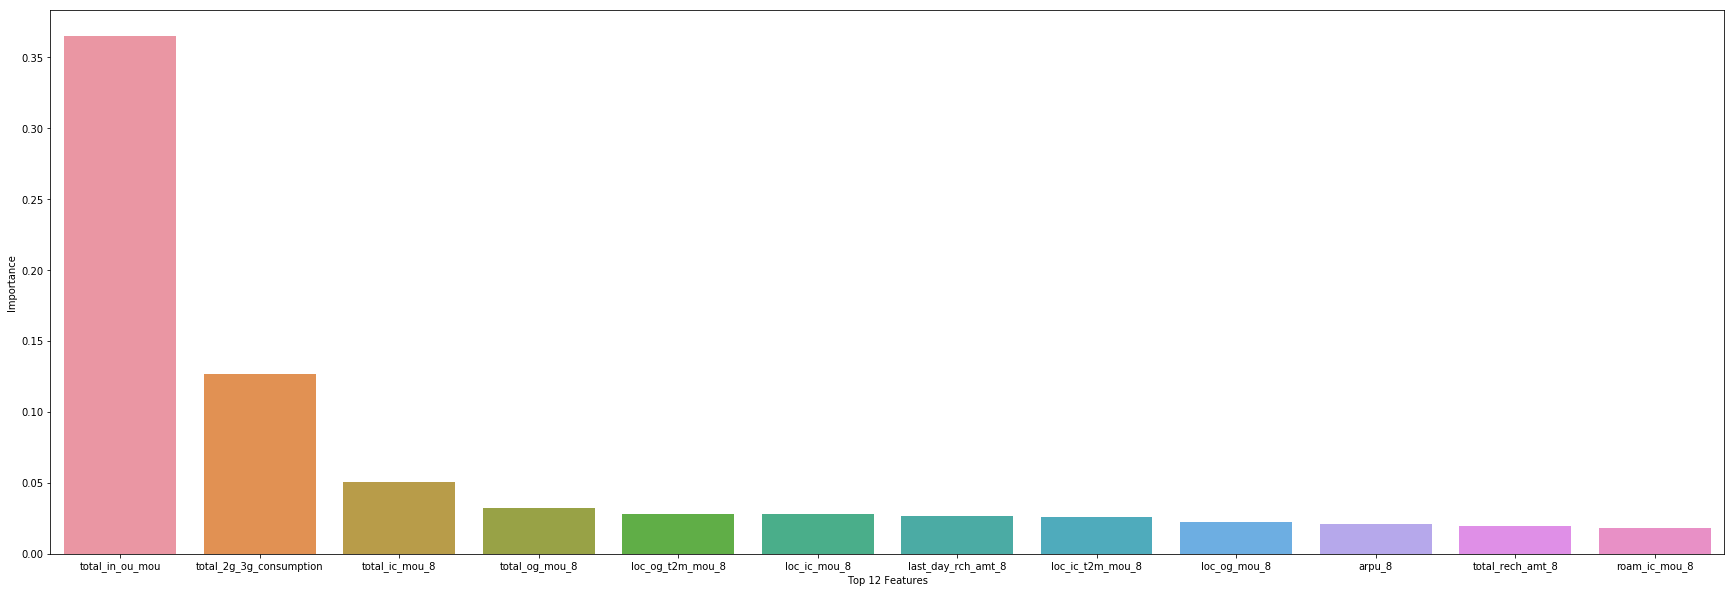

In [294]:
imp=rfc_final.feature_importances_
names=X_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(30, 10))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:12])
ax.set(xlabel = 'Top 12 Features', ylabel = 'Importance')
plt.show()

In [ ]:
master_df['churn'] = master_df['churn'].astype('object', copy = False)

df_sample = master_df.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Arpu across months', fontsize=20)
plt.show()

df_sample = master_df.groupby(['churn'])['last_day_rech_amt_6', 'last_day_rech_amt_7', 'last_day_rech_amt_8'].mean()
df_sample.plot.bar()
plt.suptitle('Maximum Recharge Amount', fontsize=20)
plt.show()

df_sample = master_df.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Average Incoming Call for August - Roaming trend across months', fontsize=20)
plt.show()

df_sample = master_df.groupby(['churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].mean()
df_sample.plot.bar()
plt.suptitle('Maximum Recharge Amount', fontsize=20)
plt.show()


df_sample = master_df.groupby(['churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].median()
df_sample.plot.bar()
plt.suptitle('Special Outgoing Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Special Outgoing Call")
plt.show()


df_sample = master_df.groupby(['churn'])['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('STD income Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average STD income Call volume")
plt.show()


df_sample = master_df.groupby(['churn'])['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC out going trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC out going")
plt.show()

df_sample = master_df.groupby(['churn'])['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC in coming trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC in coming")
plt.show()

df_sample = master_df.groupby(['churn'])['ic_others_6', 'ic_others_7', 'ic_others_8'].mean()
df_sample.plot.bar()
plt.suptitle('In coming call to Other trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average In coming call to Other")
plt.show()



### Driver Variables of Churn and Churn Analysis & Recommendation

- ARPU 7th and 8th - Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.

- date_of_last_rech_8 - Most of the Users are churned between 25th to 31st of the month. Hence providing offers prior to 25th can reduce the churn. Send out periodic offers to customers between 15th of the month to 25th of the month.

- last_day_rch_amt_8 - Lower the last day recharge amount higher the churn rate. Focus on customers whos last day recharge amount has decrased. Specialy for customers without any recharge amount.

- roam_ic_mou_8 - Higher the incoming roaming amount, higher is the churn rate. Focus on customers whose incoming roaming amount has increased, because they are likely to churn.

- std_ic_t2f_mou_8 - Lower the STD incoming call, higher is the churn rate. Focus on customers whose STD incoming call amount has decreased for that month.

- max_rech_amt_8- Focus on the customer whoes Avg max recharge amount has been decreased